# Data Management

## Setup

In [1]:
# Import modules
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


In [2]:
# Load data
df = pd.read_excel('/Users/julienmbarki/Documents/Doctorat/Publications/Article 2/Data/Code/data_requests/df_bienetre.xlsx')

# Group by playlist name
groups = df.groupby('playlist_name')


## PCA dimensionnality reduction

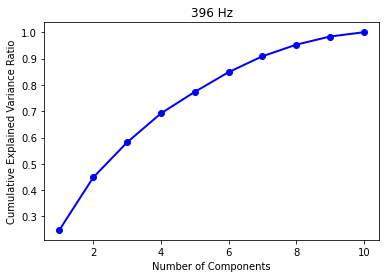

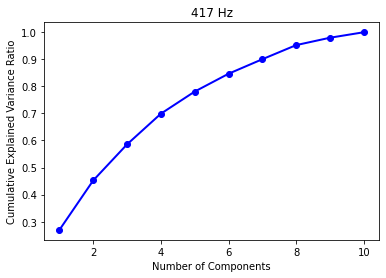

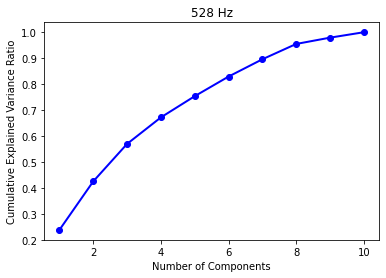

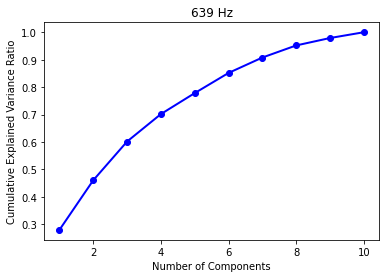

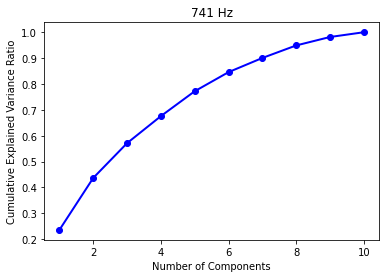

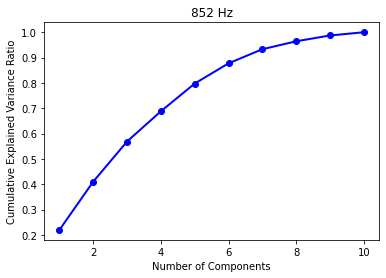

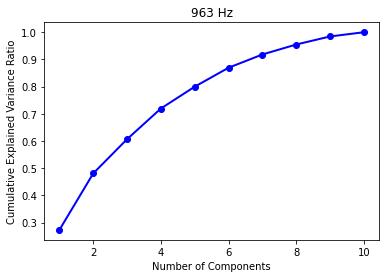

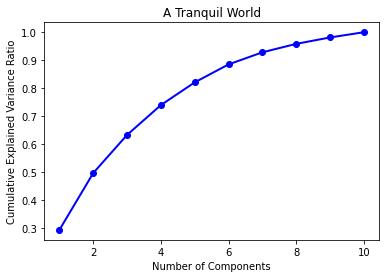

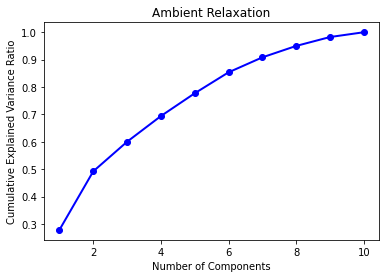

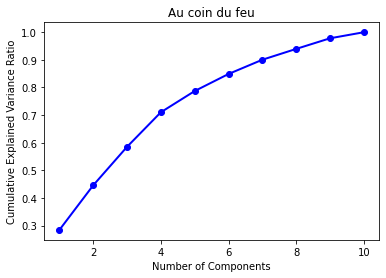

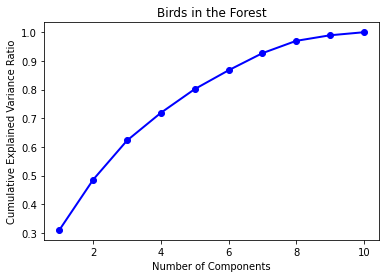

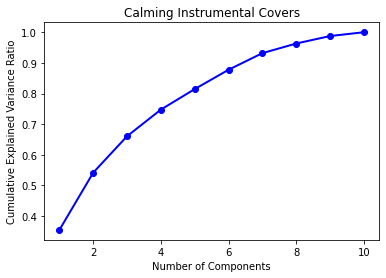

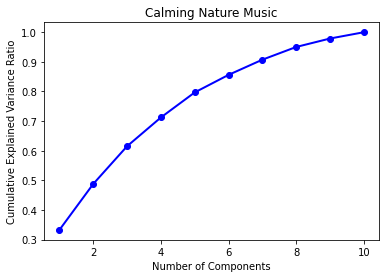

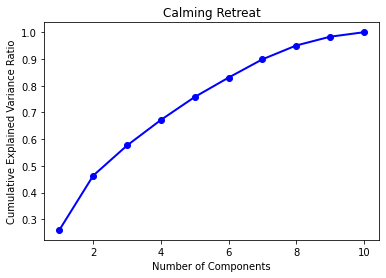

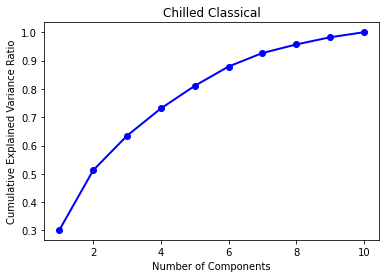

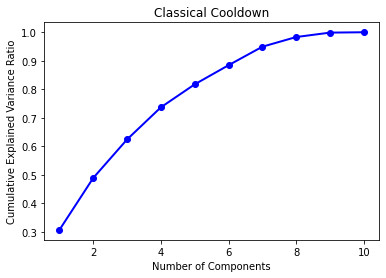

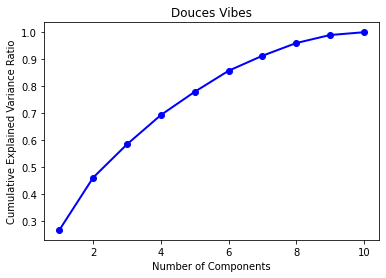

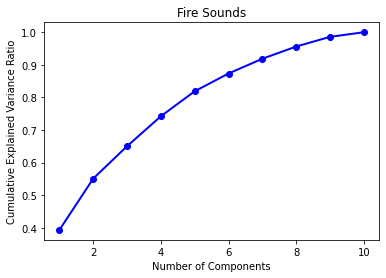

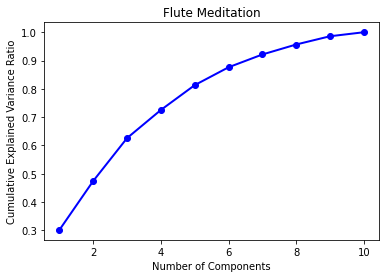

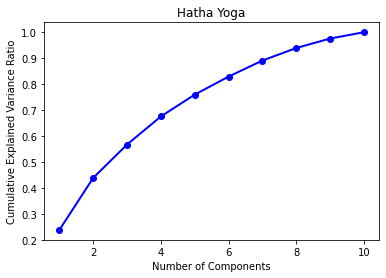

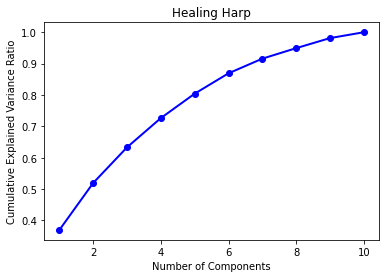

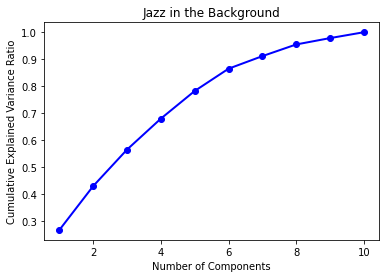

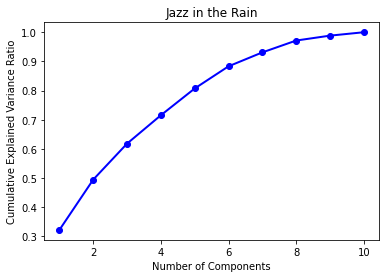

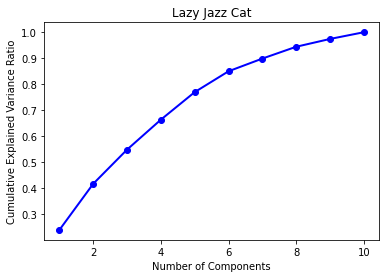

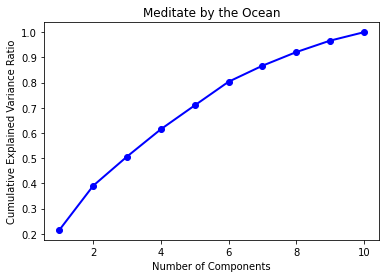

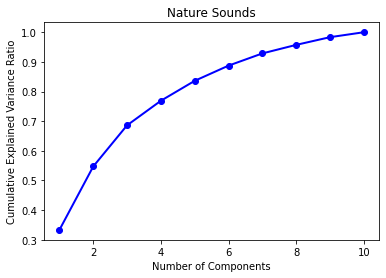

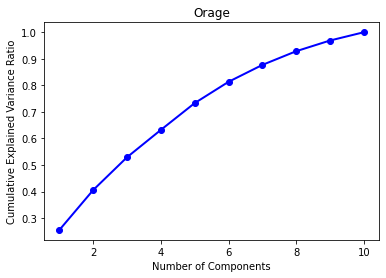

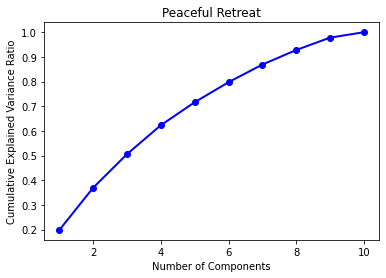

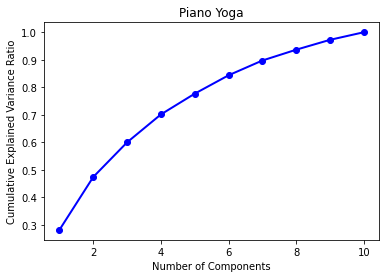

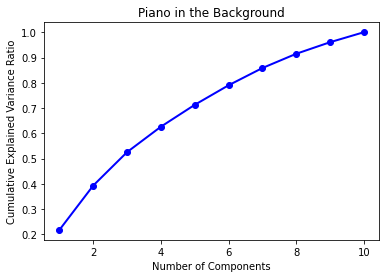

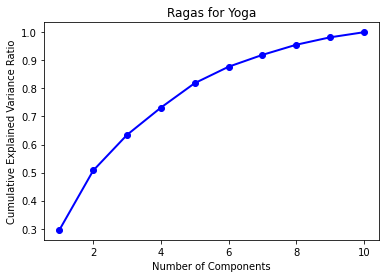

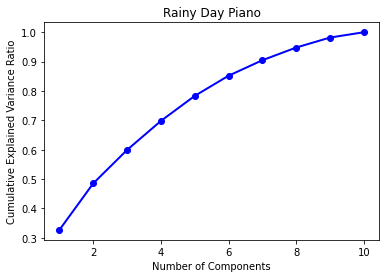

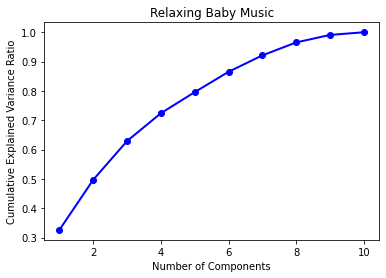

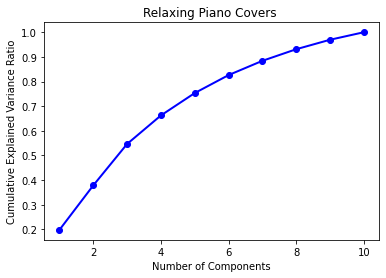

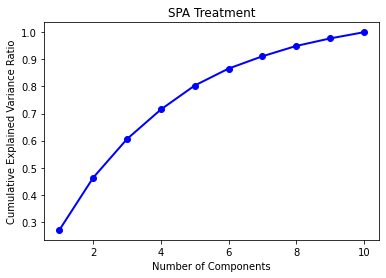

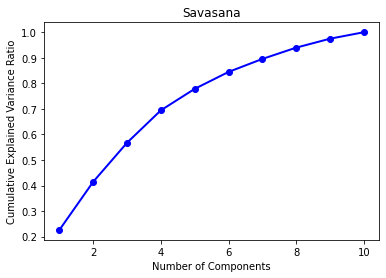

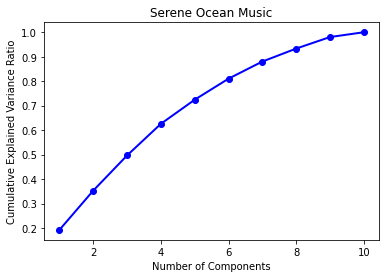

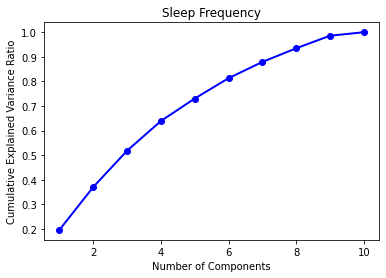

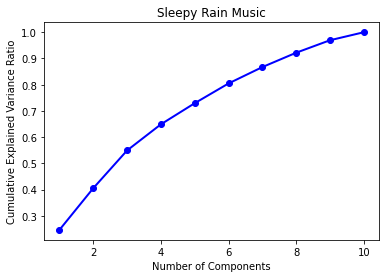

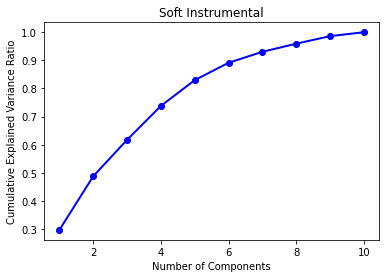

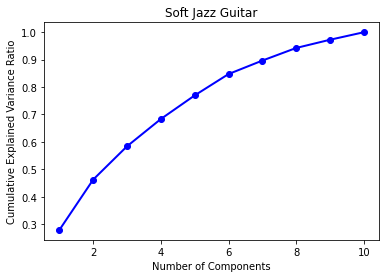

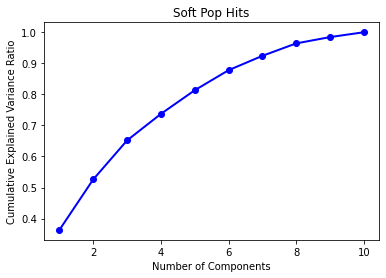

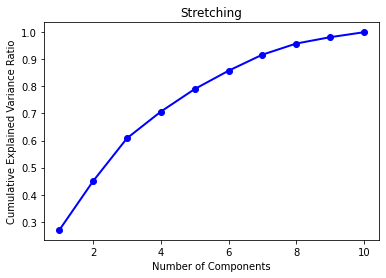

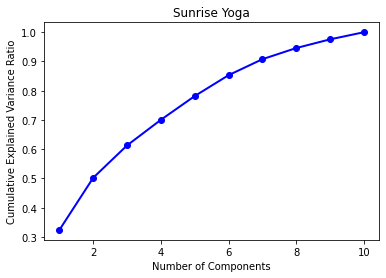

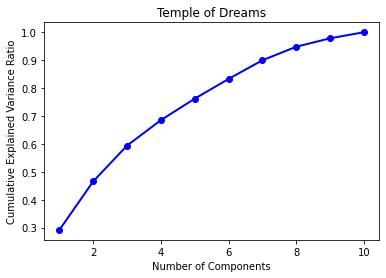

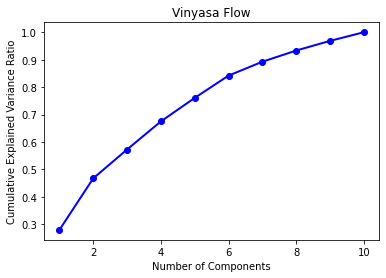

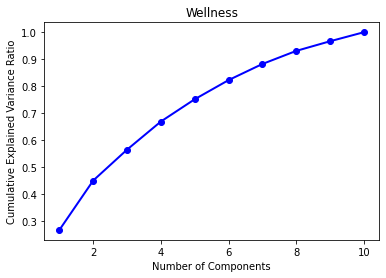

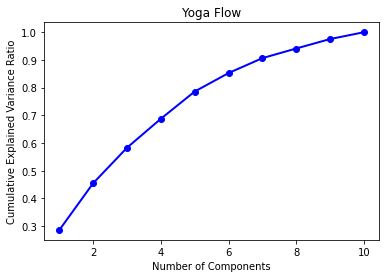

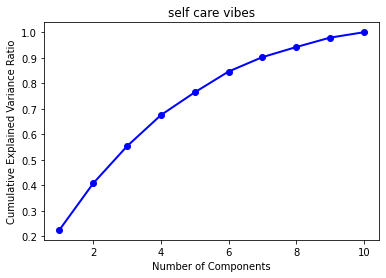

Most modal value of optimal components: 6


In [3]:
# Select the number of components
scaler = MinMaxScaler()

selected_columns = [
    "danceability", "energy", "loudness", "speechiness", 
    "acousticness", "instrumentalness", "liveness", "valence", 
    "tempo", "duration_ms"
]

optimal_num_components = []

for group_name, group in groups:
    # Subset and scale
    subset = group.loc[:, selected_columns]
    scaled_columns = scaler.fit_transform(subset)

    # Apply PCA
    pca = PCA()
    pca.fit(scaled_columns)
    
    # Calculate cumulative explained variance
    cumulative_variance = pca.explained_variance_ratio_.cumsum()
    optimal_components = next(i for i, var in enumerate(cumulative_variance) if var >= 0.8) + 1
    optimal_num_components.append(optimal_components)

    # Plot scree plot
    plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, 'bo-', linewidth=2)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title(group_name)
    plt.show()

# Calculate the most modal value
most_common_optimal = Counter(optimal_num_components).most_common(1)
most_modal_value = most_common_optimal[0][0]

print("Most modal value of optimal components:", most_modal_value)


In [4]:
# Apply PCA to reduce dimensionality
# Loop over each group and apply PCA with optimal number of components
scaler = MinMaxScaler()

selected_columns = [
    "danceability", "energy", "loudness", "speechiness", 
    "acousticness", "instrumentalness", "liveness", "valence", 
    "tempo", "duration_ms"
]

reduced_data_dict = {}

for group_name, group in groups:
    # Subset data
    subset = group.loc[:, selected_columns]

    # Scale the specified columns
    scaled_columns = scaler.fit_transform(subset)

    # Apply PCA with the optimal number of components
    n_components = 6
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(scaled_columns)
    reduced_data_dict[group_name] = reduced_data


## Clustering

### Elbow method

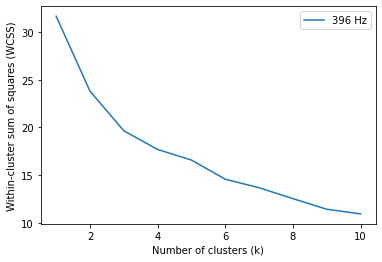

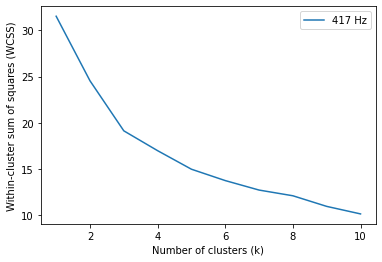

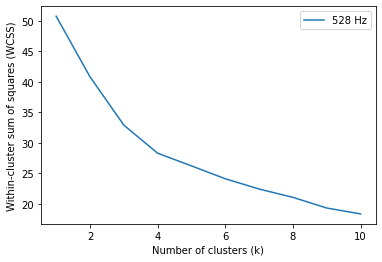

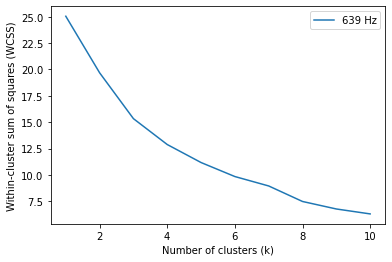

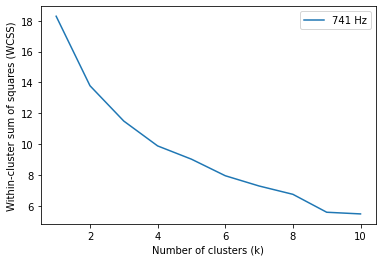

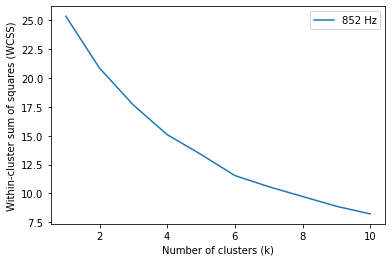

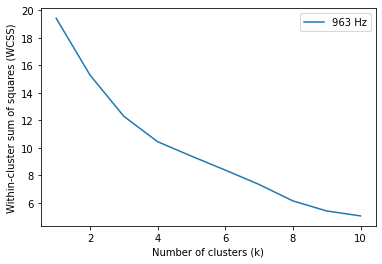

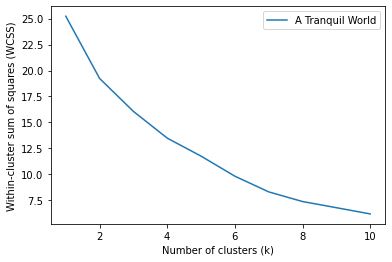

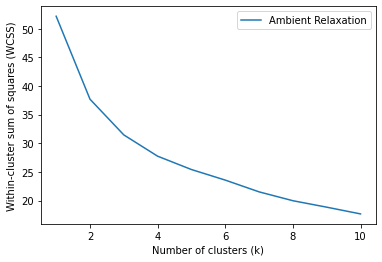

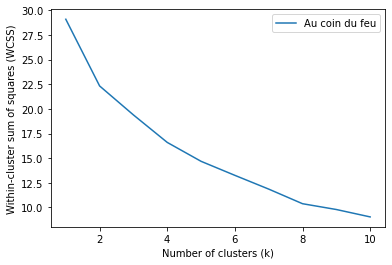

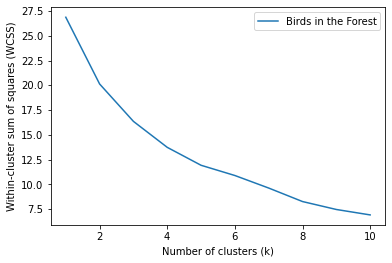

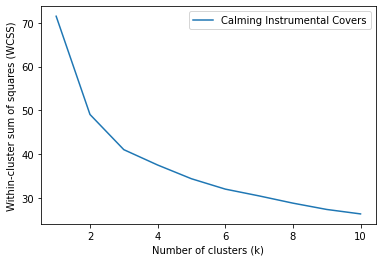

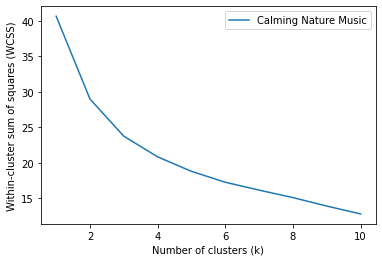

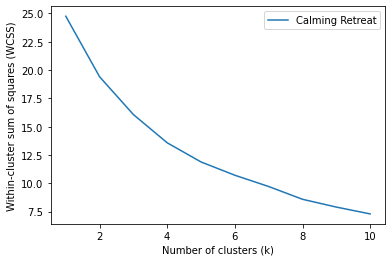

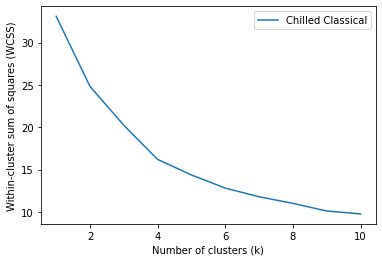

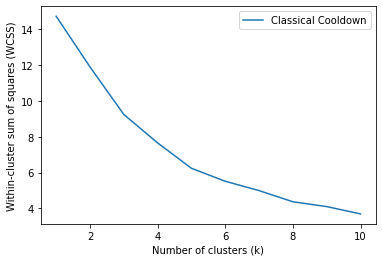

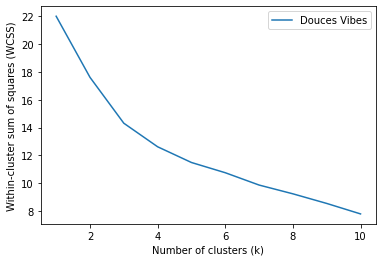

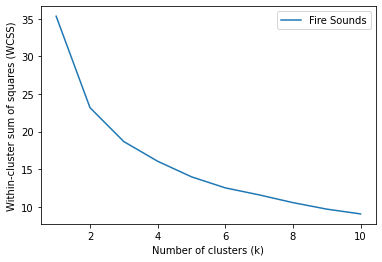

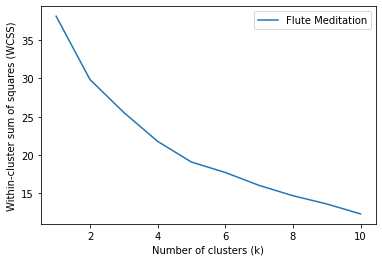

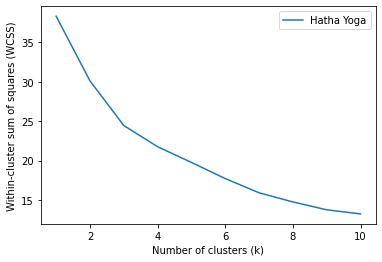

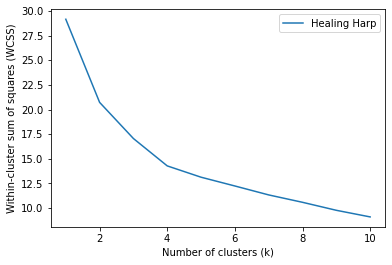

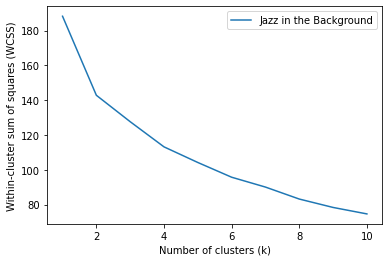

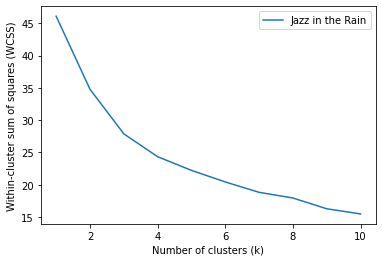

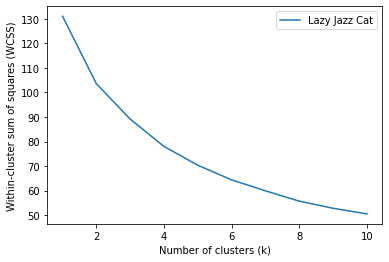

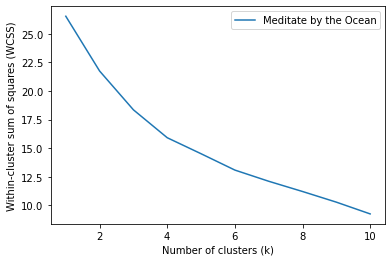

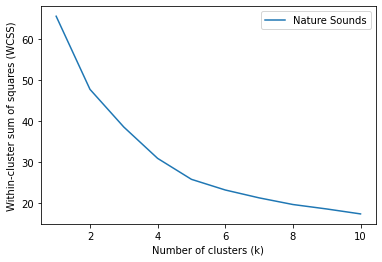

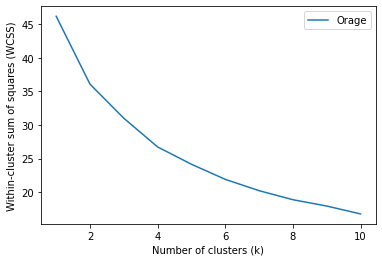

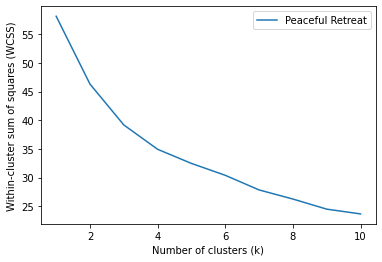

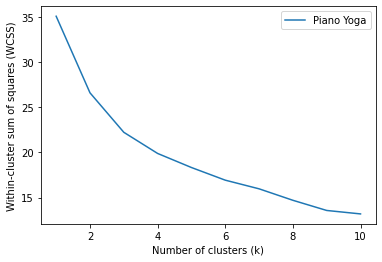

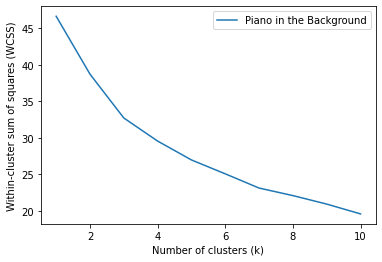

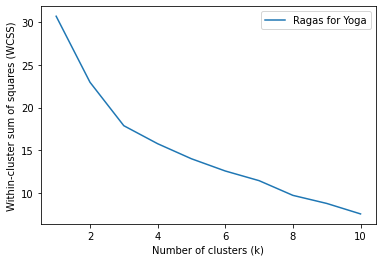

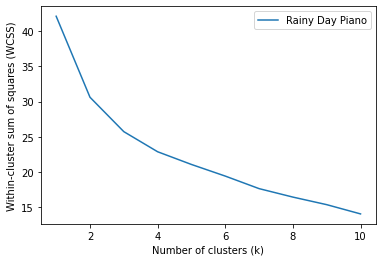

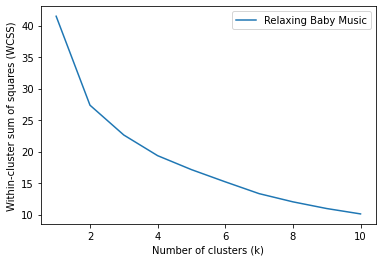

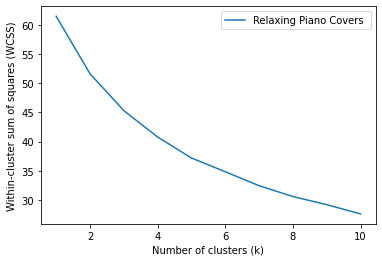

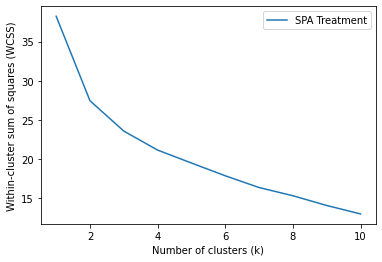

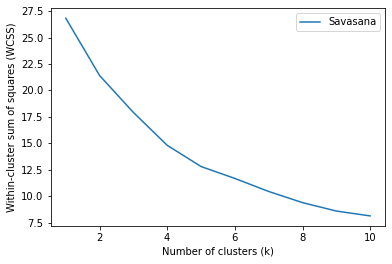

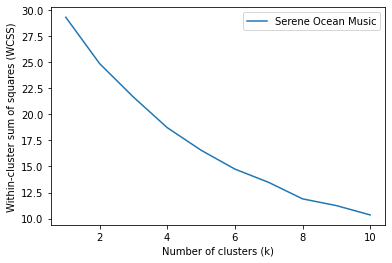

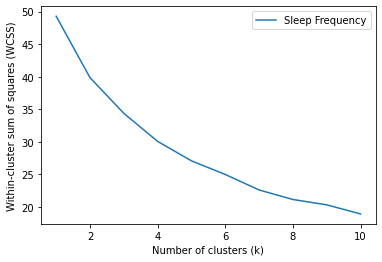

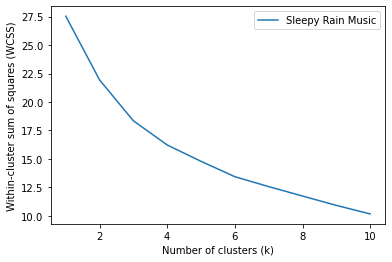

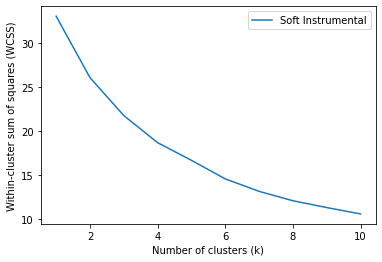

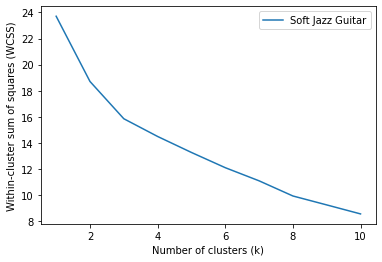

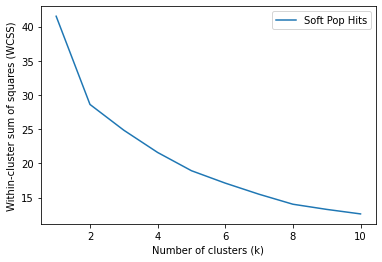

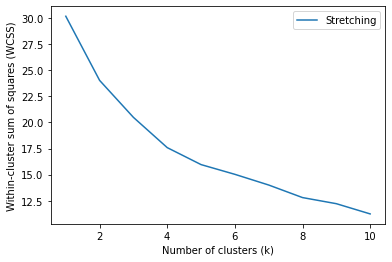

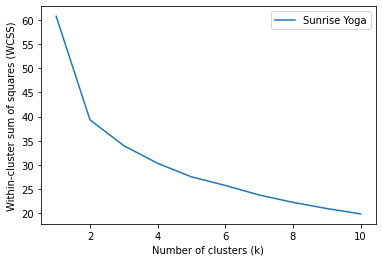

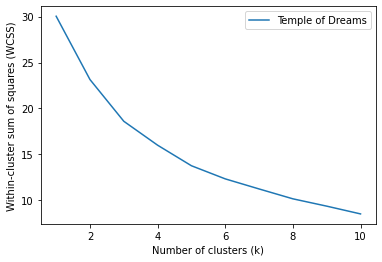

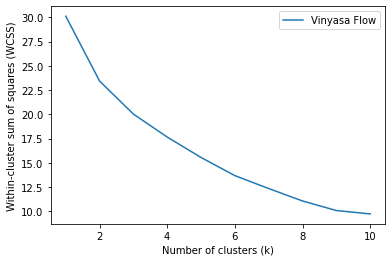

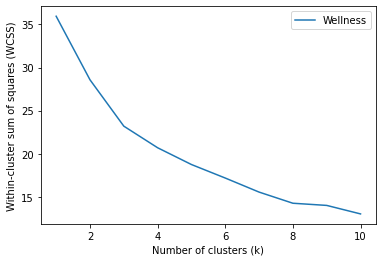

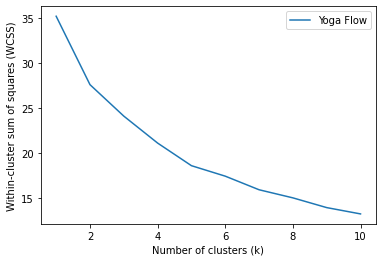

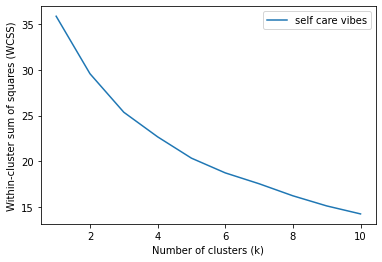

In [5]:
# Apply the elbow method to determine the optimal number of clusters
# Calculate the elbow
wcss = {}

for k in range(1, 11):
  for group_name, group in groups:
    reduced_data = reduced_data_dict[group_name]
    
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_data)
    
    if group_name not in wcss:
      wcss[group_name] = []

    wcss[group_name].append(kmeans.inertia_)

# Plot the elbow
for group_name, values in wcss.items():
  plt.plot(range(1, 11), values, label=group_name)
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Within-cluster sum of squares (WCSS)')
  plt.legend()
  plt.show()


### Gap statistic method

In [6]:
# Set random seeds
random.seed(42)
np.random.seed(42)


In [7]:
# Define a function to compute the gap statistic
def compute_gap(data, k):
  # Compute the WCSS for the real data
  kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
  wcss = kmeans.inertia_

  # Compute the null reference distribution by shuffling the data and
  # re-assigning it to clusters
  n_samples, n_features = data.shape
  wcss_null = []

  for _ in range(20):
    data_shuffled = np.random.permutation(data)
    wcss_null.append(KMeans(n_clusters=k).fit(data_shuffled).inertia_)
  
  wcss_null = np.array(wcss_null)
  
  # Compute the gap statistic and gap*
  gap = np.mean(np.log(wcss_null)) - np.log(wcss)

  # Compute the standard deviation of the null reference distribution
  gap_std = np.std(np.log(wcss_null))

  return gap, gap_std


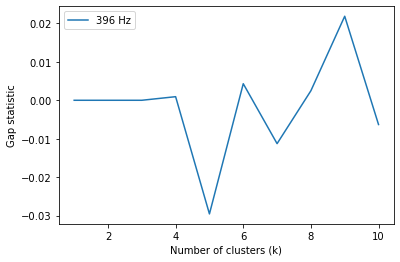

Group: 396 Hz, Optimal k (gap): 2, Optimal k (gap*): 9


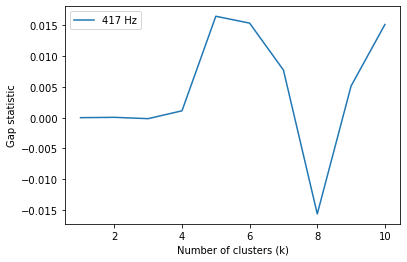

Group: 417 Hz, Optimal k (gap): 2, Optimal k (gap*): 5


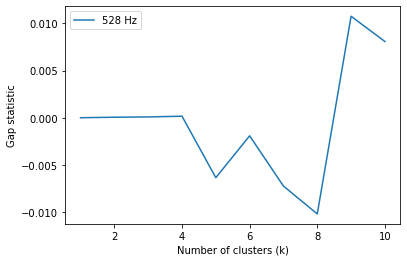

Group: 528 Hz, Optimal k (gap): 2, Optimal k (gap*): 9


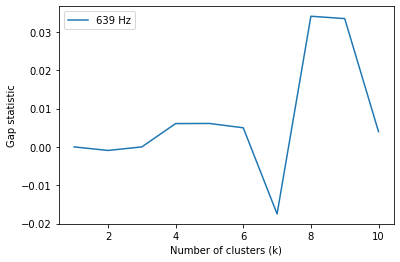

Group: 639 Hz, Optimal k (gap): 2, Optimal k (gap*): 8


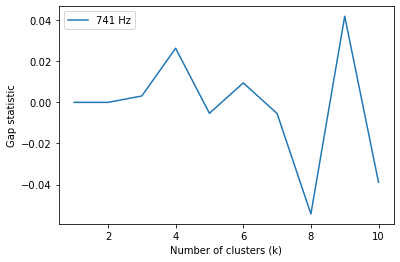

Group: 741 Hz, Optimal k (gap): 4, Optimal k (gap*): 9


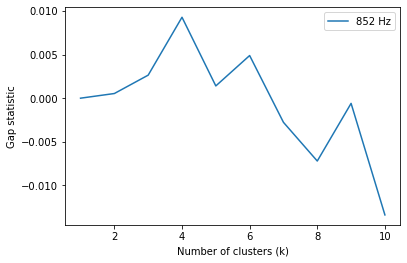

Group: 852 Hz, Optimal k (gap): 2, Optimal k (gap*): 4


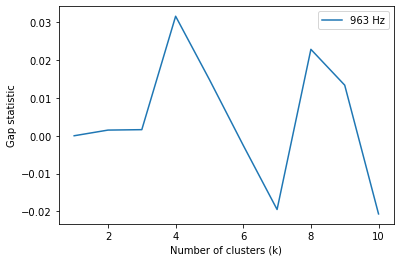

Group: 963 Hz, Optimal k (gap): 2, Optimal k (gap*): 4


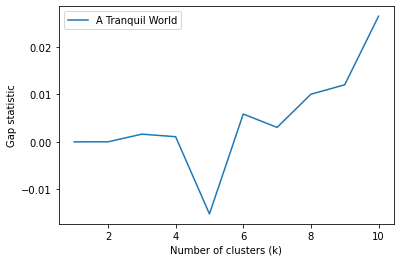

Group: A Tranquil World, Optimal k (gap): 3, Optimal k (gap*): 10


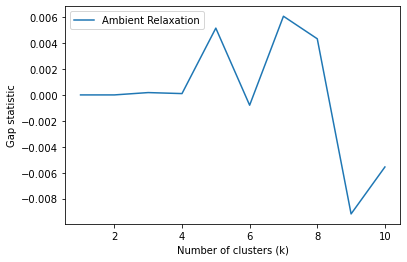

Group: Ambient Relaxation, Optimal k (gap): 3, Optimal k (gap*): 7


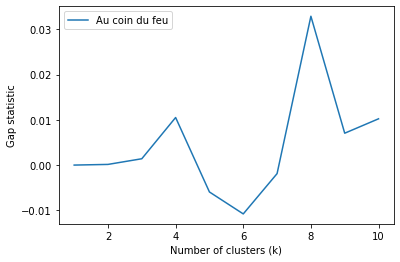

Group: Au coin du feu, Optimal k (gap): 4, Optimal k (gap*): 8


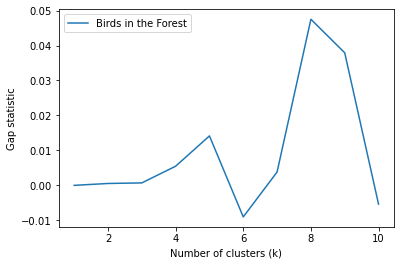

Group: Birds in the Forest, Optimal k (gap): 2, Optimal k (gap*): 8


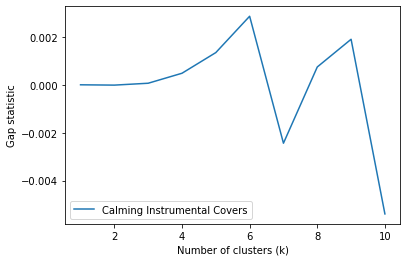

Group: Calming Instrumental Covers, Optimal k (gap): 4, Optimal k (gap*): 6


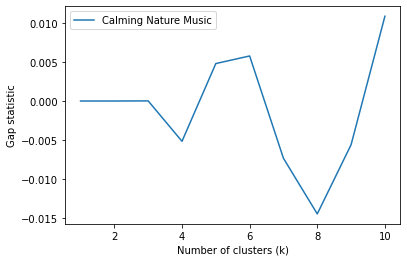

Group: Calming Nature Music, Optimal k (gap): 3, Optimal k (gap*): 10


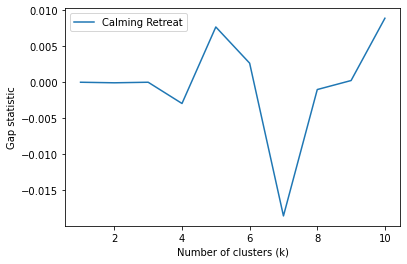

Group: Calming Retreat, Optimal k (gap): 3, Optimal k (gap*): 10


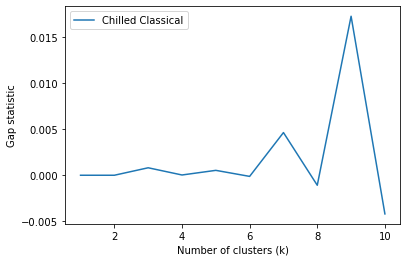

Group: Chilled Classical, Optimal k (gap): 3, Optimal k (gap*): 9


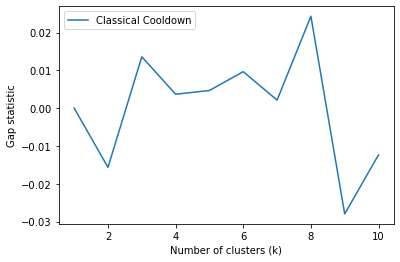

Group: Classical Cooldown, Optimal k (gap): 3, Optimal k (gap*): 8


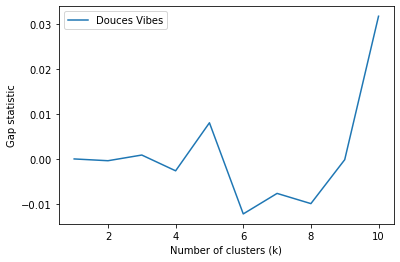

Group: Douces Vibes, Optimal k (gap): 2, Optimal k (gap*): 10


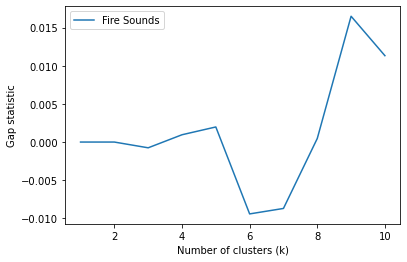

Group: Fire Sounds, Optimal k (gap): 2, Optimal k (gap*): 9


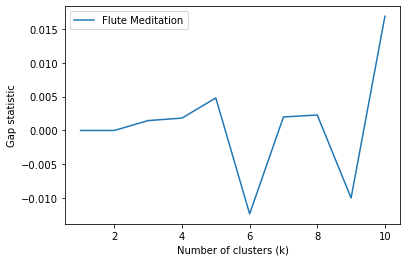

Group: Flute Meditation, Optimal k (gap): 3, Optimal k (gap*): 10


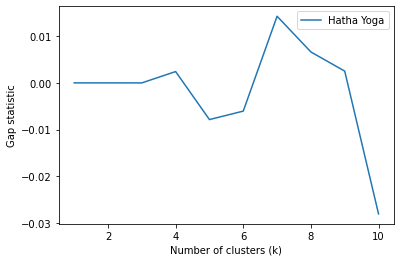

Group: Hatha Yoga, Optimal k (gap): 2, Optimal k (gap*): 7


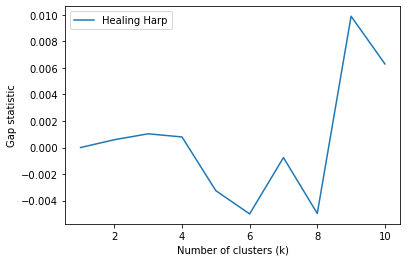

Group: Healing Harp, Optimal k (gap): 2, Optimal k (gap*): 9


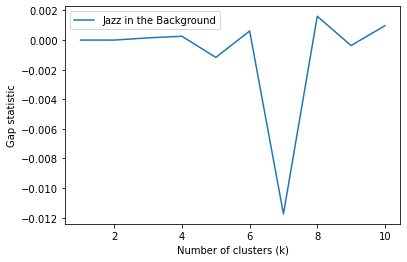

Group: Jazz in the Background, Optimal k (gap): 3, Optimal k (gap*): 8


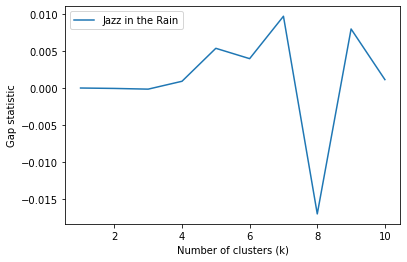

Group: Jazz in the Rain, Optimal k (gap): 2, Optimal k (gap*): 7


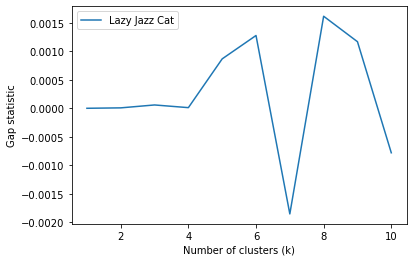

Group: Lazy Jazz Cat, Optimal k (gap): 3, Optimal k (gap*): 8


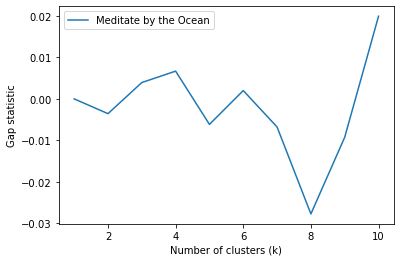

Group: Meditate by the Ocean, Optimal k (gap): 3, Optimal k (gap*): 10


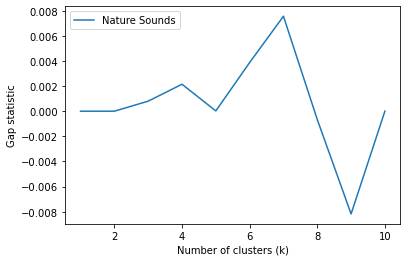

Group: Nature Sounds, Optimal k (gap): 4, Optimal k (gap*): 7


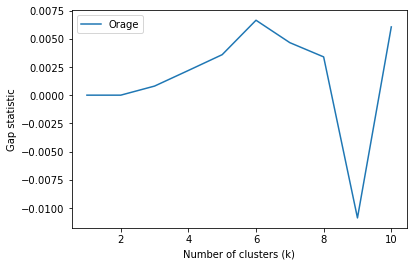

Group: Orage, Optimal k (gap): 4, Optimal k (gap*): 6


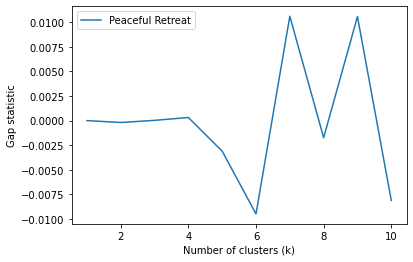

Group: Peaceful Retreat, Optimal k (gap): 4, Optimal k (gap*): 7


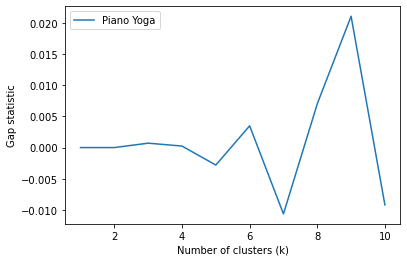

Group: Piano Yoga, Optimal k (gap): 3, Optimal k (gap*): 9


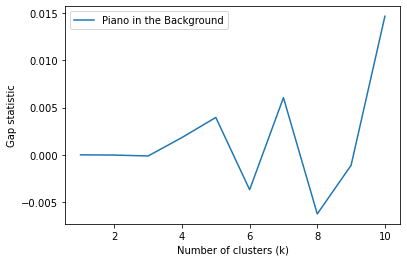

Group: Piano in the Background, Optimal k (gap): 2, Optimal k (gap*): 10


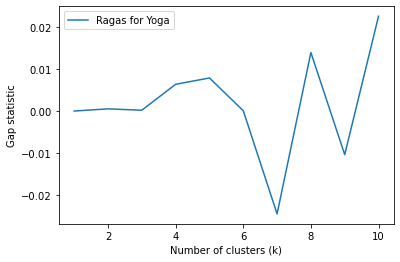

Group: Ragas for Yoga, Optimal k (gap): 2, Optimal k (gap*): 10


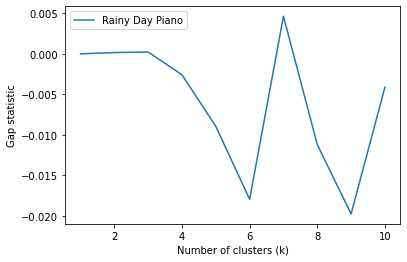

Group: Rainy Day Piano, Optimal k (gap): 2, Optimal k (gap*): 7


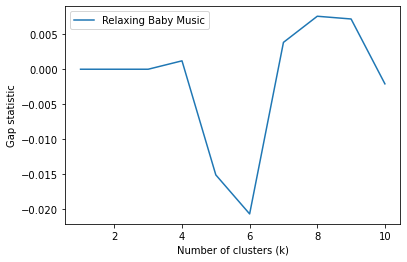

Group: Relaxing Baby Music, Optimal k (gap): 2, Optimal k (gap*): 8


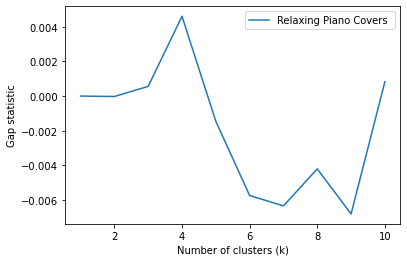

Group: Relaxing Piano Covers , Optimal k (gap): 4, Optimal k (gap*): 4


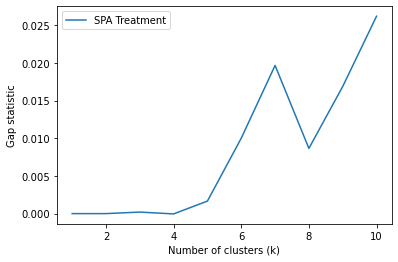

Group: SPA Treatment, Optimal k (gap): 3, Optimal k (gap*): 10


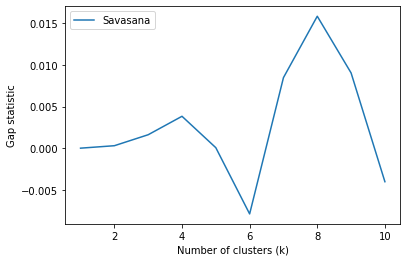

Group: Savasana, Optimal k (gap): 4, Optimal k (gap*): 8


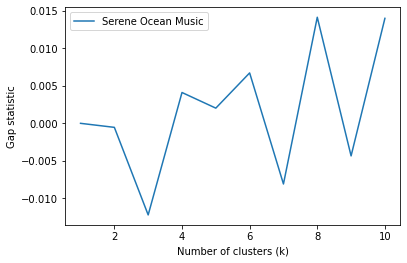

Group: Serene Ocean Music, Optimal k (gap): 2, Optimal k (gap*): 8


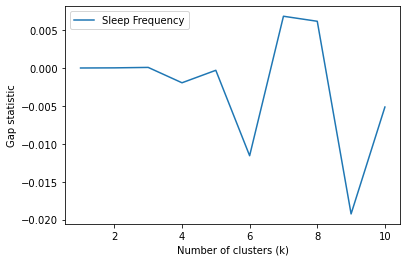

Group: Sleep Frequency, Optimal k (gap): 3, Optimal k (gap*): 7


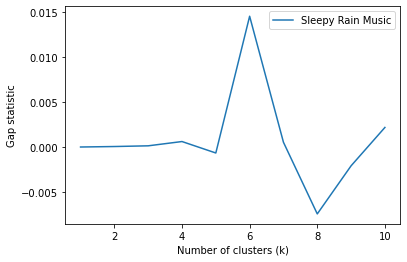

Group: Sleepy Rain Music, Optimal k (gap): 4, Optimal k (gap*): 6


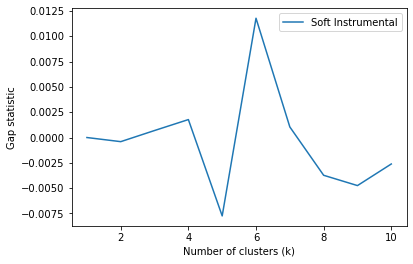

Group: Soft Instrumental, Optimal k (gap): 3, Optimal k (gap*): 6


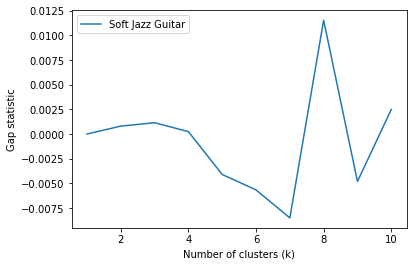

Group: Soft Jazz Guitar, Optimal k (gap): 2, Optimal k (gap*): 8


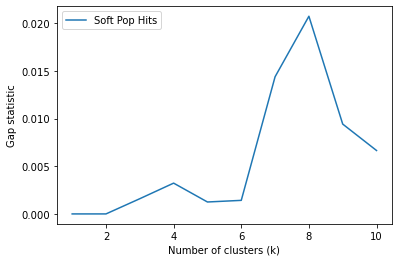

Group: Soft Pop Hits, Optimal k (gap): 3, Optimal k (gap*): 8


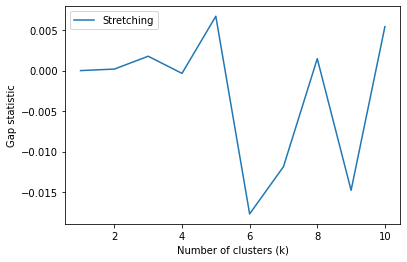

Group: Stretching, Optimal k (gap): 3, Optimal k (gap*): 5


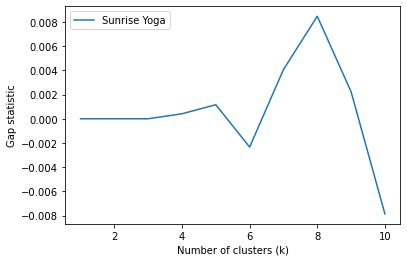

Group: Sunrise Yoga, Optimal k (gap): 2, Optimal k (gap*): 8


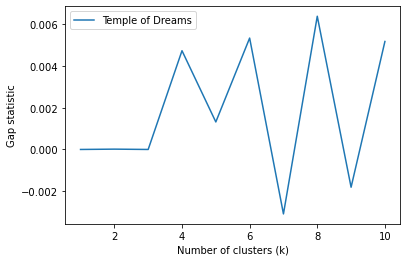

Group: Temple of Dreams, Optimal k (gap): 2, Optimal k (gap*): 8


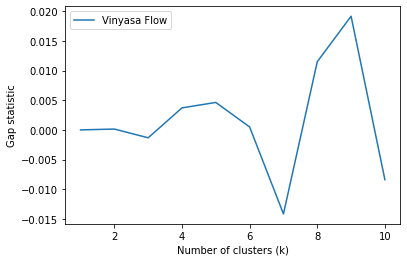

Group: Vinyasa Flow, Optimal k (gap): 2, Optimal k (gap*): 9


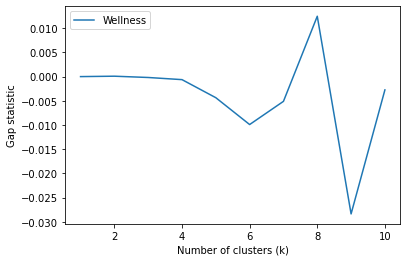

Group: Wellness, Optimal k (gap): 2, Optimal k (gap*): 8


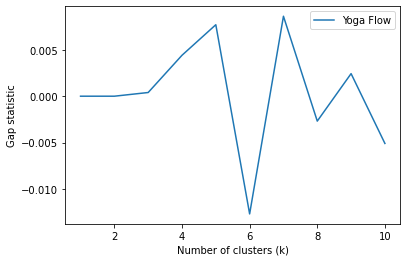

Group: Yoga Flow, Optimal k (gap): 4, Optimal k (gap*): 7


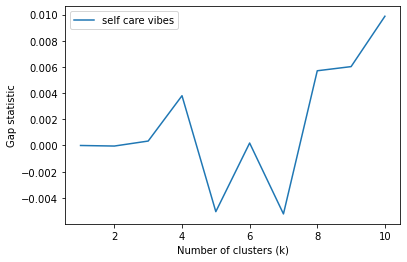

Group: self care vibes, Optimal k (gap): 2, Optimal k (gap*): 10


In [8]:
# Calculate the optimal k
# Loop over each group and generate scree plot
optimal_num_k = {}
optimal_num_k_2 = {}

for group_name, group in groups:
    group_gaps = []
    group_errors = []

    for k in range(1, 11):
        reduced_data = reduced_data_dict[group_name]

        # Compute the gap statistic and standard deviation for the current value of k
        gap, gap_std = compute_gap(reduced_data, k)
        group_gaps.append(gap)
        group_errors.append(gap_std)

    # Find the optimal number of components based on the gap statistic criterion
    optimal_k = None
    for i in range(1, len(group_gaps) - 1):
        s_k = group_errors[i]
        threshold = s_k * np.sqrt(1 + 1 / 20)
        if group_gaps[i] >= group_gaps[i + 1] - threshold:
            optimal_k = i + 1
            break

    if optimal_k is None:
        optimal_k = np.argmax(group_gaps) + 1

    optimal_num_k[group_name] = optimal_k

    # Find the optimal number of components based on the gap* statistic criterion
    for i in range(1, len(group_gaps)):
        optimal_k_2 = np.argmax(group_gaps) + 1

    optimal_num_k_2[group_name] = optimal_k_2

    # Plot the gap statistics
    plt.plot(range(1, 11), group_gaps, label=group_name)

    # Set labels and display the plot
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Gap statistic')
    plt.legend()
    plt.show()

    print(f"Group: {group_name}, Optimal k (gap): {optimal_num_k[group_name]}, Optimal k (gap*): {optimal_num_k_2[group_name]}")


### Apply KMeans

Group 396 Hz: [0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0
 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1]


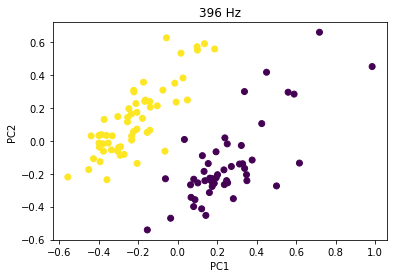

Group 417 Hz: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 0 1 0]


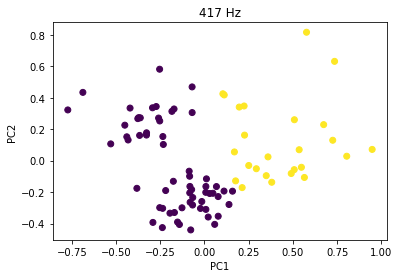

Group 528 Hz: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0]


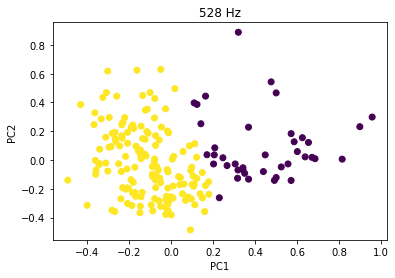

Group 639 Hz: [0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0]


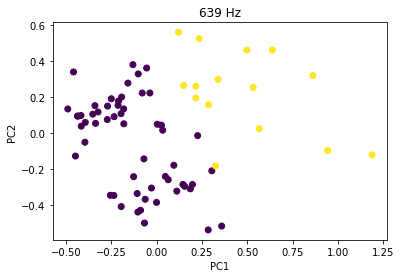

Group 741 Hz: [1 0 0 2 0 2 2 0 0 0 1 1 0 2 0 2 1 2 0 2 2 1 0 1 2 0 2 0 1 2 2 1 1 2 2 0 0
 2 0 2 3 1 1 1 0 2 2 0 3 0 1 0 2 1 2 1]


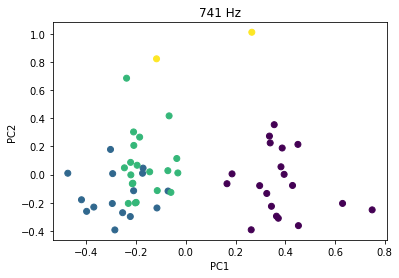

Group 852 Hz: [0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1]


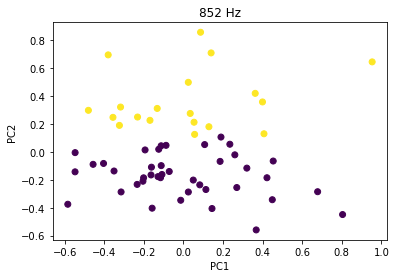

Group 963 Hz: [1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0]


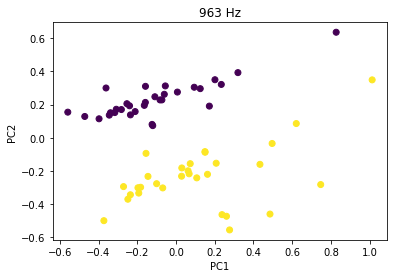

Group A Tranquil World: [2 1 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 1 0 0 0 2 0 2 2 0 1 1 0 2 2 1 0 1
 1 2 0 2 2 1 0 0 1 2 1 2 2 1 0 1 1 2 2 2 0 2 2 0 2 1 2 0 1 0 0 2 1 1 2 0 2
 1]


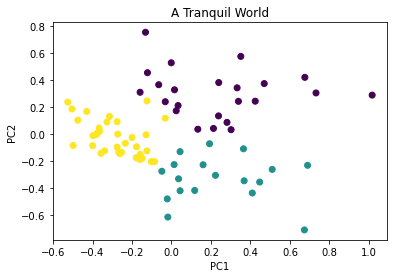

Group Ambient Relaxation: [0 0 0 1 1 1 0 1 0 2 1 0 1 1 1 1 1 1 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 0 1 1 2 0 1 0 1 0 1 0 2 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 2 2 0 0 0 1 1 1 1 0
 0 0 0 0 1 0 2 2 1 2 2 2 0 0 2 0 0 1 2 0 2 1 0 0 0 0 1 2 1 1 2 2 2 0 1 0 2
 0 0 2 1 2 2 0 2 2 0 0 2 2 1 2 1 0 2 0 0 2 2 2 0 0 2 2 0 2 2 2 2 2 1 0 2 0
 2 2 2 2 0 2 0 1 2 0 1 0 0 2 1 2 0 0 1 2 2 0 0 0 1 2 0 0 0 0 2 0 2 0 2 2 0
 0 2 0 2 1 2 1 2]


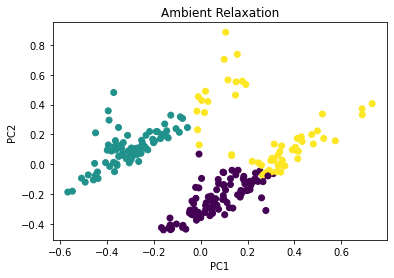

Group Au coin du feu: [3 3 3 1 1 3 1 1 2 0 3 1 1 1 2 3 2 2 1 1 1 1 2 2 2 2 0 1 1 1 1 2 2 2 2 1 1
 2 0 1 0 1 1 0 1 2 1 0 3 1 0 0 2 1 1 2 0 1 1 1 1 0 1 2 0 1 1 1 1 0]


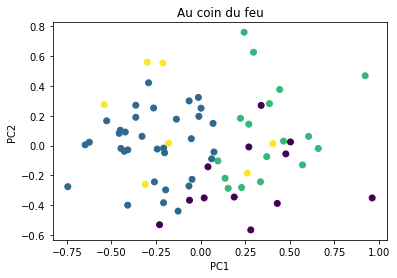

Group Birds in the Forest: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0]


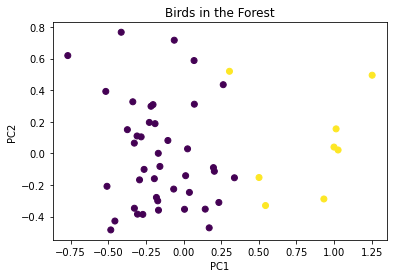

Group Calming Instrumental Covers: [3 3 3 3 3 2 2 3 3 2 2 0 2 3 0 2 2 2 0 1 3 2 1 2 0 2 1 3 0 2 1 2 0 1 0 2 0
 2 3 1 3 2 3 3 2 1 1 1 3 1 3 1 2 1 1 0 2 1 1 1 1 0 2 0 2 2 1 1 2 2 1 0 2 3
 0 3 2 1 1 1 0 1 0 0 0 2 3 1 1 3 1 1 3 3 2 2 2 2 1 1 3 1 1 0 1 3 1 2 2 2 0
 1 1 2 2 3 2 2 0 3 2 1 1 1 1 1 2 3 0 0 2 1 3 1 3 1 0 1 3 3 3 2 1 3 0 1 0 0
 2 1 3 1 1 1 1 2 3 2 1 3 1 1 1 2 1 1 3 2 2 0 3 1 3 3 3 3 1 3 0 1 0 0 3 3 1
 2 2 2 2 1 1 1 3 3 2 0 3 0 2 0 2 3 1 3 2 3 3 1 0 2 2 2 3 3 3 1 2 3 0 1 0 2
 1 0 0 3 1 3 0 0 1 3 2 3 2 0 0 3 3 1 3 3 2 1 2 2 3 2 2 0 3 1 0 3 3 3 3 1 2
 3 2 2 3 3 1 3 2 0 0 3 0 0 3 2 2 3 3 1 1 2 3 3 3 3 3 3 3 0 3 3 2 2 2 2 2]


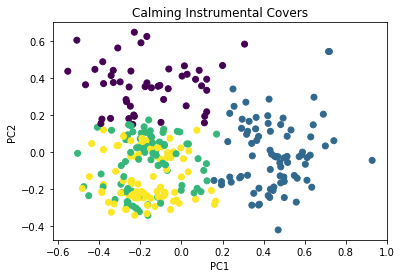

Group Calming Nature Music: [2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 2 1 0 2 2 2 1 2 0 1
 2 1 1 2 2 2 2 2 1 2 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 0 1 1 2
 1 2 1 1 1 1 2 2 0 0 0 0 1 2 0 0 1 1 2 1 0 2 1 2 1 0 2 1 0 1 1 2 0 2 0 1 1
 1 1 2 1 1 2 1 2 0 2 1 2 2 1]


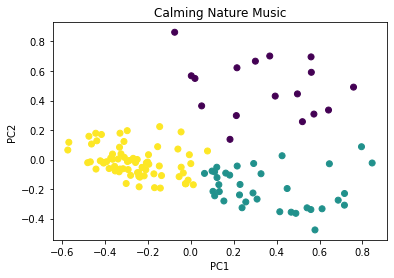

Group Calming Retreat: [2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 1
 2 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 2 1 2 1 2 2 2 2 2 1 2 2 2 2 1 2 0 1 2 1
 2 1 2 2 2 2 1 2 1 2 2 1 2 2 0]


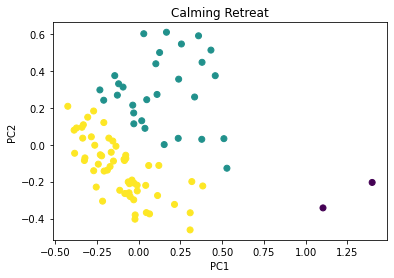

Group Chilled Classical: [1 0 0 0 0 0 1 1 1 2 0 0 1 2 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 2 1 0 0 1
 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 2 0 1 2 0 0 1 2 0 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 0 1 0 0 0 2 0 1 1 2 0 0 0 2 1 1 0 0 1 0 0 2 1 0 0 1 0 0 1 2 0 0 1 0 0 1
 0 1 1 1 0 2 1 0 0 2]


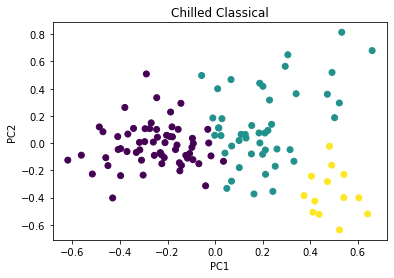

Group Classical Cooldown: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 0 1 1 0 1 2 1 1 2 2 2
 0 1 2 0 2 1 1 1 2]


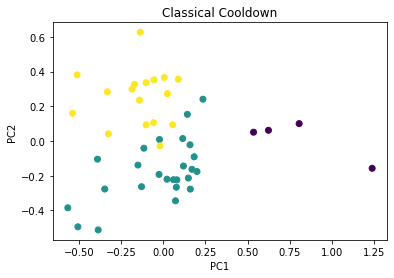

Group Douces Vibes: [1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0]


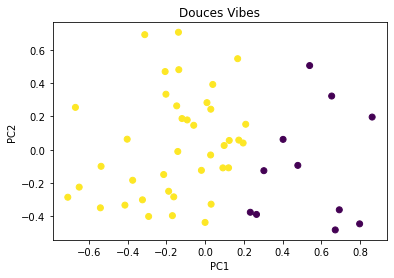

Group Fire Sounds: [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0
 1]


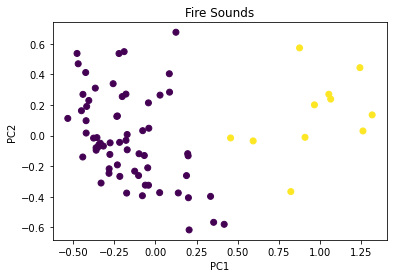

Group Flute Meditation: [0 1 1 1 0 0 1 0 1 0 2 2 1 2 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 1 1 1 1 2 1 1 0 0 0 1 0 0 2 0 0 0 0 0 2 0 0 1 0 2 1 1 0 0 0 0 0 0 1 0 1
 0 2 0 2 0 0 0 1 0 1 0 0 0 2 1 0 1 1 2 0 1 2 1 0 0 2 0 2 1 2 2 0 0 0 1 1 1
 1 2 2 1 0 0 2 0 1 1 0 2 0 0 0 0 0 0 2 0 1 0 2 0 1 1 2 2 2 2 0 2 0 2]


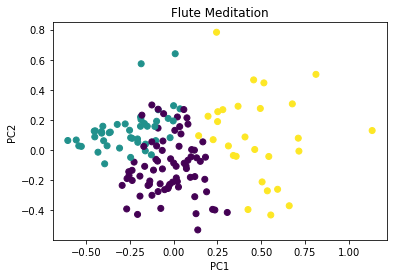

Group Hatha Yoga: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1]


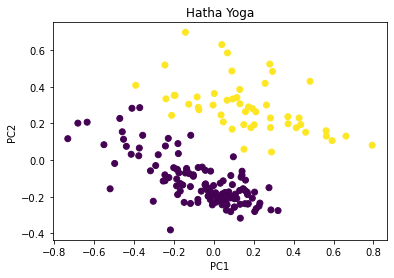

Group Healing Harp: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0]


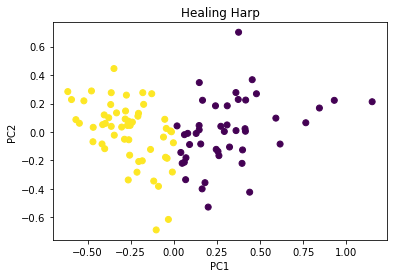

Group Jazz in the Background: [1 1 1 1 1 0 1 0 1 1 1 0 2 0 1 1 1 1 1 1 1 1 0 1 1 1 0 2 1 1 1 1 1 2 0 0 1
 0 1 1 1 1 0 2 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 2 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 2 0 0 1 1 1 1 1 0 0 1 1 2 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 2 1 1 1 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 2 0 1 0 1 1 1 1 1 1 1 0 1 1 0 2 0 1 0 1 1 1 1 2 0 0 1 1 1 1 1 0
 2 0 0 0 2 0 1 1 1 1 1 2 1 0 0 1 1 2 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 0 1 0 1 2 0 0 1 0 1 1 1 0 0 1 2 1 1 0 0 0 2 2 0 0 0 0 1 1 2 1 1 1 1 2 1
 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 2 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 1 2 1 0 2 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 2 0 2 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 2 1 0 0 1 1
 0 1 1 1 1 2 1 1 1 0 1 1 1 0 1 1 0 2 0 1 1 1 0 1 0 1 1 0 2 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 2 0 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1

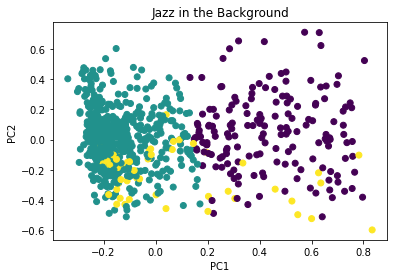

Group Jazz in the Rain: [1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 0]


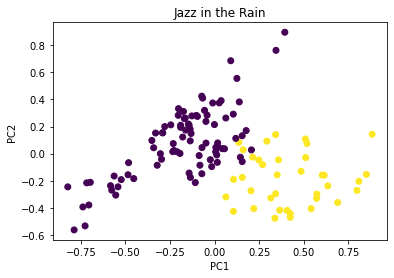

Group Lazy Jazz Cat: [0 0 0 2 1 1 0 1 2 0 0 2 0 2 1 2 2 2 1 0 0 2 2 2 1 0 0 1 1 1 2 1 0 2 1 0 1
 1 2 2 2 2 1 2 1 2 0 0 0 2 0 0 0 2 2 2 1 2 0 1 1 1 1 1 0 0 2 1 0 1 0 0 1 1
 0 2 1 1 2 0 2 0 1 0 2 2 0 1 1 0 1 1 0 0 2 2 0 1 2 1 2 2 1 2 1 0 2 2 0 0 1
 1 0 0 1 1 2 1 2 1 0 0 1 0 0 0 2 2 2 1 2 2 1 1 2 1 0 1 1 1 0 1 1 0 2 1 0 1
 2 1 1 2 0 1 0 1 2 2 2 1 1 0 2 1 2 2 1 2 1 2 1 1 1 1 1 2 1 1 0 2 0 1 1 1 1
 1 1 0 0 2 1 1 1 0 0 0 2 0 1 2 1 1 2 1 1 0 1 2 1 0 1 0 1 1 1 1 1 0 1 1 2 1
 0 2 1 0 1 1 1 0 1 2 0 0 0 0 0 1 1 2 0 1 1 0 2 1 1 2 0 1 0 1 1 0 0 0 2 0 2
 0 1 0 2 2 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 1 2 0 0 0 1 0 2 1 1 0 1 1 1 1 0 2 0 1 1 1 0 1 1 0 0 1 1 1 2 1 1 1 1 1
 1 0 2 1 1 0 2 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 1 1 2 2 1 1 1 1 0 0 1 0 2 0 1 1 1 0 2 1 1 0 0 1 1 1 0 0 0 1 1 1 0 2
 0 1 1 0 0 1 1 0 1 0 2 1 0 0 1 1 1 1 0 1 1 0 1 1 0 2 0 1 0 1 1 0 1 0 0 1 1
 2 1 1 1 0 1 0 1 0 0 1 0 0 1 2 0 0 1 1 1 1 0 1 0 0 1 1 0 2 1 0 1 0 1 0 0 1
 0 0

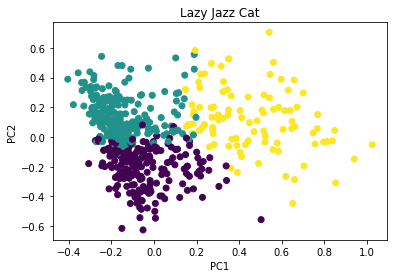

Group Meditate by the Ocean: [0 1 0 0 0 0 0 0 2 1 0 2 0 2 0 2 2 0 0 0 2 0 0 1 0 2 0 0 0 1 2 1 2 0 2 0 1
 0 0 2 1 0 0 2 0 0 0 0 1 1 2 0 2 2 0 1 2 2 0 0 0 0 1 2 1 1 0 1 0 2 0 2 0 0
 1]


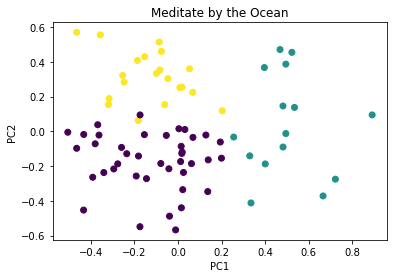

Group Nature Sounds: [1 1 3 0 2 1 1 1 1 0 1 3 1 0 1 1 3 3 3 3 3 1 1 0 1 3 1 3 1 2 1 3 0 1 3 3 1
 0 0 3 0 3 1 1 2 1 3 0 0 0 1 2 1 1 3 3 2 1 1 1 2 3 2 0 3 1 0 0 0 3 3 1 1 0
 1 0 1 3 1 1 3 3 1 1 1 0 3 3 2 3 1 1 3 1 3 1 1 2 3 3 1 1 1 3 2 1 1 1 3 1 2
 3 1 2 2 2 1 3 3 1 0 2]


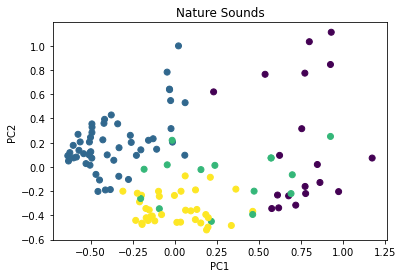

Group Orage: [0 0 1 2 0 2 2 2 2 0 0 0 3 1 2 2 2 0 2 2 2 2 2 0 3 2 0 0 2 2 0 2 3 2 3 3 2
 0 3 2 0 3 2 3 3 3 0 3 0 2 3 2 1 1 2 3 2 3 2 2 0 2 2 0 2 3 2 3 1 3 2 1 2 0
 3 2 0 2 3 0 3 0 2 1 0 1 3 3 2 2 1 3 1 3 0 2 3 3 2 2 3 2 0 2 3 3 3 0 0 3 3
 2 1 2 3 2 0 2 0 3 3 1 3 3 3]


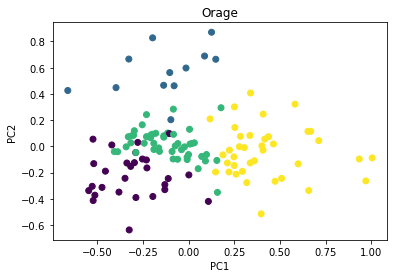

Group Peaceful Retreat: [0 0 3 3 3 1 3 1 3 0 3 0 3 3 1 0 1 3 3 3 3 0 3 1 1 3 3 3 1 2 0 3 3 0 0 3 1
 3 2 2 3 0 1 3 3 3 3 1 1 3 3 3 2 3 2 3 2 0 3 0 1 0 3 3 0 0 1 1 1 2 3 2 0 3
 1 3 0 0 0 3 0 0 1 3 3 1 1 1 1 3 3 0 3 0 3 3 2 3 3 1 1 1 1 3 2 0 2 1 3 3 1
 0 3 3 1 3 3 1 2 0 1 1 1 1 2 3 2 1 0 1 3 3 0 2 1 1 1 3 2 3 1 0 2 0 0 0 0 0
 1 1 0 1 0 1 1 1 1 0 0 2 0 0 1 2 1 2 0 0 1 2 3 2 0 0 1 3 0 0 1 3 0 3 3 0 3
 2 1 1 1 0 1 2 1 1 0 1 0 2 0 1 1 1 0 0 0 3 1 0 1 1 1 1 0 2 0 0 1 2 0 0 1 0]


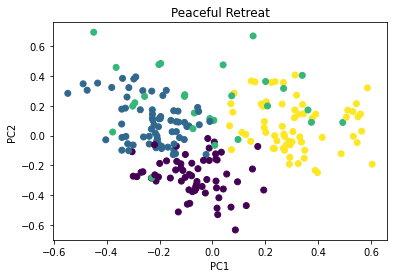

Group Piano Yoga: [1 1 1 2 0 0 0 0 0 0 0 0 2 1 2 0 0 1 0 0 0 0 1 0 2 0 1 2 0 0 1 1 0 0 2 1 1
 1 0 2 1 1 0 0 2 0 0 1 0 0 2 0 0 0 1 0 1 1 0 0 1 0 0 2 0 1 0 1 1 2 2 1 2 0
 0 0 2 2 0 1 2 1 1 2 1 0 0 1 1 0 0 0 2 1 1 2 0 0 0 1 1 2 0 0 1 0 1 1 2 1 0
 1 1 2 1 0 0 2 1 0 0 1]


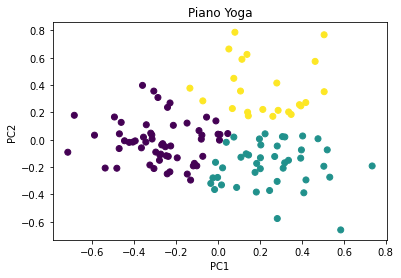

Group Piano in the Background: [1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


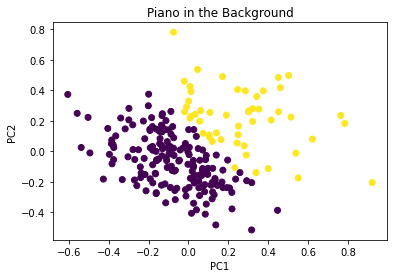

Group Ragas for Yoga: [1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1]


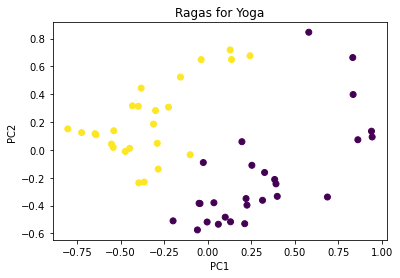

Group Rainy Day Piano: [1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1]


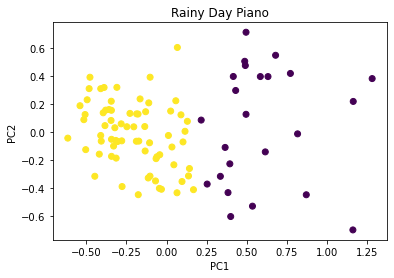

Group Relaxing Baby Music: [1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1]


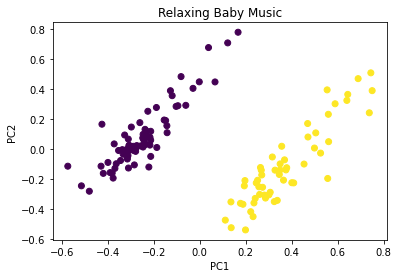

Group Relaxing Piano Covers : [1 1 2 1 3 2 1 0 0 1 2 0 0 0 1 0 0 3 0 1 2 2 3 1 3 0 3 0 0 1 3 3 3 1 1 0 3
 3 1 3 0 1 1 0 1 3 2 3 3 2 1 3 2 2 3 2 1 1 1 1 3 0 0 0 0 3 0 1 0 1 3 2 2 0
 3 0 2 2 3 1 0 1 2 1 0 3 1 3 3 3 1 3 1 1 2 0 1 3 0 2 3 1 0 2 1 3 1 3 3 1 0
 0 1 3 1 2 1 2 1 0 2 2 3 2 2 1 1 0 1 3 1 2 2 0 3 3 2 1 1 3 3 2 1 3 0 0 3 1
 2 0 1 1 1 3 1 3 1 2 1 0 2 0 1 2 2 1 1 0 1 3 0 2 1 3 2 3 1 3 3 0 1 1 3 1 1
 1 3 1 3 0 1 2 2 2 1 0 2 1 1 2 3 1 1 3 2 3 1 1 3 1 2 3 3 2 0 2 1]


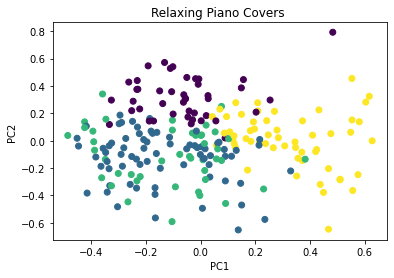

Group SPA Treatment: [1 1 1 2 2 1 2 1 1 2 1 1 0 2 0 1 1 1 2 1 2 1 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1
 2 1 1 1 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 0 2 2 2 2 0 1 2 2
 2 2 0 2 2 1 2 1 0 1 0 1 2 2 1 1 2 1 0 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 1 0
 1 0 1 1 2 1 1 2 1 1 0 2 1 0 1 1 1 0 2 0 1 1 2 2 2 2 1 0 1 1 0 1 1 1 0 0 1
 2 2 2 2 2 2 0 2 0 2 0 0 2 1 0 0 2 0 0 0 0 2 1 0 0 1 2 1]


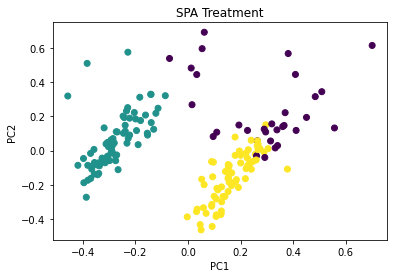

Group Savasana: [1 1 1 2 0 1 2 1 1 0 1 1 2 1 2 1 1 1 1 0 1 1 2 2 1 1 0 0 1 1 1 1 0 3 1 0 1
 1 2 0 2 1 0 1 3 1 1 1 2 0 3 1 1 1 0 1 0 1 1 1 0 1 0 0 0 2 1 1 1 1 0 2 1 0
 0 1 1 1 0 1 3 1 1 1 1 1 1 3 1 3 1 1 1 1 3 0 1 3 0 0 1 1 1 2 2]


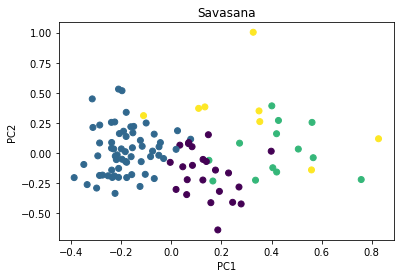

Group Serene Ocean Music: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]


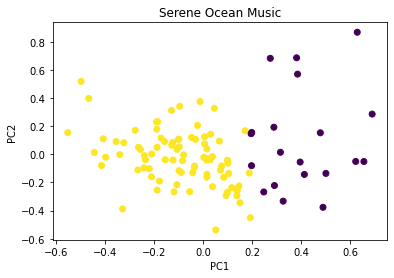

Group Sleep Frequency: [2 0 2 1 0 0 0 2 0 1 0 0 0 2 0 2 0 1 0 0 1 0 0 2 2 0 2 1 0 2 1 0 0 1 1 2 2
 2 1 0 0 1 0 0 0 2 1 2 2 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 2 0
 0 2 0 1 2 0 0 2 0 2 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 2 2 0 1 1 2 2 2 0 1
 0 1 2 2 2 0 0 1 0 0 0 0 2 0 0 1 2 2 0 2 1 2 0 2 1 0 0 0 0 0 2 0 0 0 0 1 0
 2 2 2 2 2 0 0 0 0 2 0 2 2 0 0 2 1 0 1 0 0 1 2 1 0 0 2 1 2 0 0 2 0 0 1 0 0
 2 2 0 2 0 0 0 0 0 0 0 2 2]


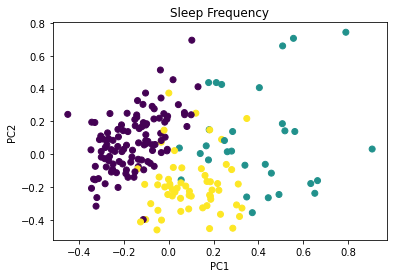

Group Sleepy Rain Music: [0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 3 0 1 0 0 1 3 3 2 3 0 2 0 3 0 2 1 0 3 1 1 1
 0 3 1 0 3 0 0 0 2 1 0 1 0 1 0 3 2 2 0 3 3 0 0 3 0 0 2 0 3 0 0 3 2 1 3 3 1
 1 3 0 1 0 0 0 0 1 0 2 1 0 0 0 3 3 2 3 0 0 3 3 2 0 0 0 1 0 1 0 0 1 1 1 1 2
 1 1 0 2 2 3 0]


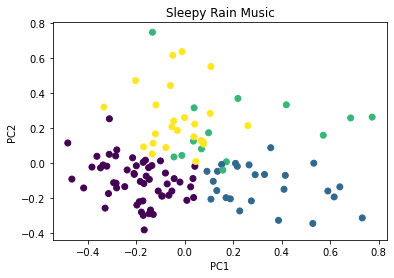

Group Soft Instrumental: [2 1 2 0 1 0 0 2 1 1 2 1 2 1 2 0 1 1 0 2 1 1 1 2 2 0 1 0 1 2 2 2 1 2 1 2 2
 0 0 2 1 1 1 1 1 2 0 2 0 2 2 2 1 0 2 1 2 1 0 2 2 2 2 2 1 1 2 0 2 0 0 0 2 1
 2 2 1 1 0 2 2 1 1 1 0 1 1 2 0 1 2 1 1 1 1 2 2 1 1 2 2 0 2 2]


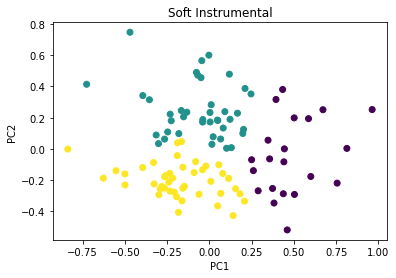

Group Soft Jazz Guitar: [1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1]


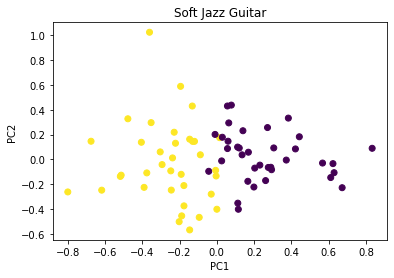

Group Soft Pop Hits: [2 2 2 2 1 1 0 1 1 1 2 2 2 1 1 0 1 2 2 2 1 1 2 2 2 2 1 1 1 0 2 2 1 2 1 1 1
 2 2 1 1 0 1 0 1 2 0 1 2 1 2 0 2 1 2 1 1 2 0 1 2 1 1 1 1 1 0 2 1 1 1 1 0 2
 1 1 1 1 2 1 2 2 0 1 0 2 1 2 2 2 1 1 1 1 1 2 1 2 2 1]


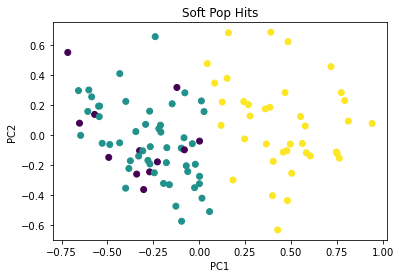

Group Stretching: [1 2 1 0 2 1 0 1 2 2 2 1 0 2 0 1 2 0 1 2 2 0 1 2 2 0 1 0 0 1 2 0 0 1 1 2 2
 0 1 1 0 2 1 2 2 1 1 2 1 1 2 1 1 2 1 0 2 1 1 1 2 1 1 1 0 1 0 0 1 2 2 0 1 1
 2 0 0 1 2 1 1 1 0 1 1 0 1 0 0 1 2 0 2 1 1 2 0 0 2 1]


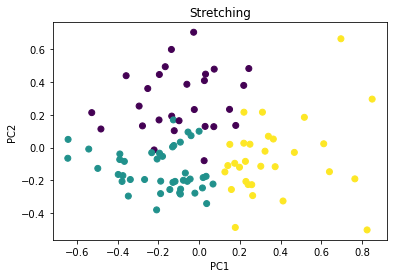

Group Sunrise Yoga: [0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1
 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0]


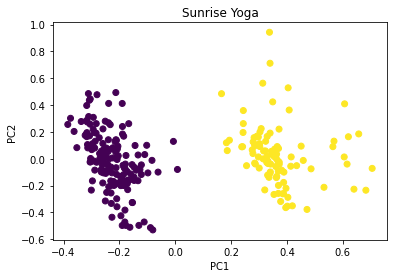

Group Temple of Dreams: [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


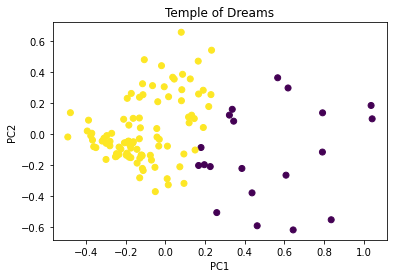

Group Vinyasa Flow: [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0]


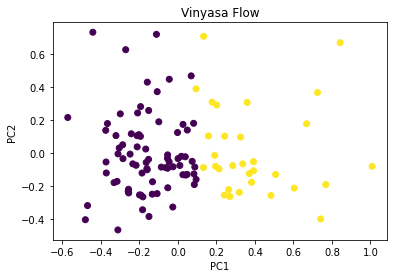

Group Wellness: [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1]


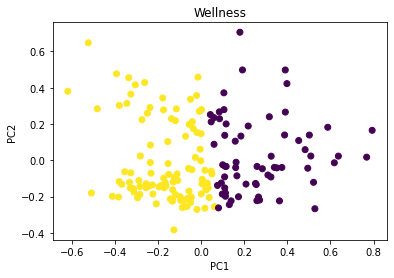

Group Yoga Flow: [2 0 2 2 0 0 0 3 0 3 3 3 0 2 2 2 3 2 3 3 2 2 2 0 2 2 2 2 3 0 0 2 0 1 2 3 0
 0 3 2 3 0 2 2 3 0 3 0 3 3 2 0 3 3 2 3 2 0 2 2 0 0 0 2 2 0 2 0 0 3 0 3 2 3
 0 2 2 0 3 0 0 2 0 2 3 2 0 3 0 0 0 1 2 3 3 3 3 1 2 0 3 2 3 0 2 2 0 0 3 3 3
 0 2 2 0 3 2 0 2 2 2 0 1 2 3 0 0 2 0 2 3 3 3 2 2 1 2]


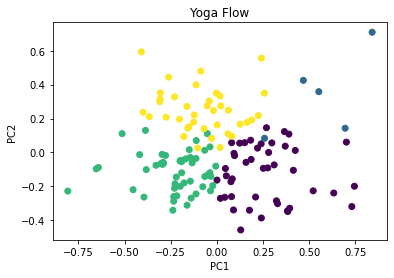

Group self care vibes: [0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1]


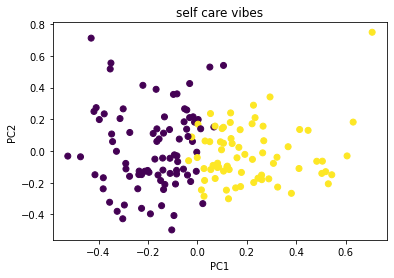

playlist_name  playlist_followers playlist_owner  \
3505           396 Hz               71542        Spotify   
3506           396 Hz               71542        Spotify   
3507           396 Hz               71542        Spotify   
3508           396 Hz               71542        Spotify   
3509           396 Hz               71542        Spotify   
...               ...                 ...            ...   
5149  self care vibes               86893        Spotify   
5150  self care vibes               86893        Spotify   
5151  self care vibes               86893        Spotify   
5152  self care vibes               86893        Spotify   
5153  self care vibes               86893        Spotify   

                     track_name  track__popularity track_release_date  \
3505              Sunborn 396Hz                 59         2024-04-11   
3506  396 Hz - Unending Silence                 41         2023-06-09   
3507               Enyrma 396Hz                 49         2024-01-25   
3508        396 Hz - Dimensions                 35         2022-11-09   
3509               Sthir 396 Hz                 33         2024-03-17   
...                         ...                ...                ...   
5149                Une chambre                 49         2021-09-03   
5150            A bed of tulips                 47         2021-06-11   
5151                Who You Are                 48         2021-09-03   
5152                  Suki Desu                 47         2021-06-24   
5153                Everlasting                 52         2021-09-17   

                artist_name  artist_popularity  danceability   energy  ...  \
3505  The Relief Experience                 46         0.154  0.00463  ...   
3506         Aerin Villegas                 52         0.187  0.00882  ...   
3507    Balanced Resonances                 37         0.139  0.23000  ...   
3508            Koh Lantana                 38         0.154  0.00337  ...   
3509            Feldgeister                 37         0.384  0.03620  ...   
...                     ...                ...           ...      ...  ...   
5149     Ferdinand Lapointe                 36         0.203  0.01220  ...   
5150          Luanna Averie                 33         0.521  0.00580  ...   
5151           Cary Appleby                 38         0.412  0.05980  ...   
5152           Marlon Guild                 45         0.406  0.00420  ...   
5153      Cassandra Nestico                 48         0.430  0.04040  ...   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
3505       0.0486         0.972             0.753    0.1000   0.0372  134.349   
3506       0.0454         0.991             0.743    0.1020   0.1310   69.146   
3507       0.0469         0.820             0.786    0.1150   0.0395   84.477   
3508       0.0415         0.965             0.943    0.1060   0.0320  133.803   
3509       0.0756         0.987             0.734    0.1320   0.0494  116.507   
...           ...           ...               ...       ...      ...      ...   
5149       0.0430         0.991             0.889    0.1340   0.2050  170.852   
5150       0.0459         0.994             0.961    0.1430   0.4160   64.963   
5151       0.0399         0.995             0.971    0.1100   0.4640   54.351   
5152       0.0899         0.993             0.961    0.1040   0.0599   66.574   
5153       0.0404         0.982             0.939    0.0982   0.1040   82.137   

      duration_ms  time_signature  cluster  cluster_2  
3505       166000               4        0          5  
3506       117647               4        1          4  
3507       179833               4        1          6  
3508       175995               4        0          5  
3509       171440               4        0          8  
...           ...             ...      ...        ...  
5149       162000               4        1          2  
5150       160250               4        0          

In [9]:
# Apply KMeans with optimal number of clusters
df = pd.DataFrame()

kmeans_dict = {}
kmeans_2_dict = {}
cluster_labels_dict = {}
cluster_labels_2_dict = {}

for group_name, group in groups:
    reduced_data = reduced_data_dict[group_name]

    k = optimal_num_k[group_name]
    k_2 = optimal_num_k_2[group_name]

    # Apply KMeans with optimal number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_data)
    kmeans_2 = KMeans(n_clusters=k_2, random_state=42).fit(reduced_data)
    
    kmeans_dict[group_name] = kmeans
    kmeans_2_dict[group_name] = kmeans_2

    cluster_labels_dict[group_name] = kmeans.labels_
    cluster_labels_2_dict[group_name] = kmeans_2.labels_

    print(f"Group {group_name}: {kmeans.labels_}")

    # Assign cluster labels to original group data
    group = group.assign(cluster=kmeans.labels_)
    group = group.assign(cluster_2=kmeans_2.labels_)

    # Append group to original dataframe
    df = pd.concat([df, group])
    
    # Plot clusters
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(group_name)
    plt.show()

display(df)


## Variables creation

### HH-Index

In [10]:
groups = df.groupby('playlist_name')


In [11]:
# Calculate the shares of each cluster
shares_perc = {}

for group_name, group in groups:
    shares = group['cluster'].value_counts(normalize=True)
    shares_perc[group_name] = shares * 100

# Calculate the HHI
hhi = {}
hhi_2 = {}

for group_name, group in groups:
  shares = group['cluster'].value_counts(normalize=True)
  hhi[group_name] = sum((shares*100)**2)

  shares_2 = group['cluster_2'].value_counts(normalize=True)
  hhi_2[group_name] = sum((shares_2*100)**2)

print(hhi)
print(hhi_2)

print("Minimum HHI: ", min(hhi.values()))
print("Mean HHI: ", np.mean(list(hhi.values())))
print("Median HHI: ", np.median(list(hhi.values())))
print("Maximum HHI: ", max(hhi.values()))
print("Standard deviation: ", np.std(list(hhi.values())))


{'396 Hz': 5021.399248842694, '417 Hz': 5876.149269875609, '528 Hz': 6726.53842066107, '639 Hz': 6667.327911128743, '741 Hz': 3156.8877551020414, '852 Hz': 5672.222222222221, '963 Hz': 5001.34372480516, 'A Tranquil World': 3571.555555555555, 'Ambient Relaxation': 3441.587901701323, 'Au coin du feu': 3342.8571428571427, 'Birds in the Forest': 7312.0, 'Calming Instrumental Covers': 2598.2189026141914, 'Calming Nature Music': 4332.159999999999, 'Calming Retreat': 5313.723014770863, 'Chilled Classical': 4186.189467932518, 'Classical Cooldown': 4395.08506616257, 'Douces Vibes': 6568.0, 'Fire Sounds': 7496.8888888888905, 'Flute Meditation': 3828.299643281807, 'Hatha Yoga': 5883.910123966942, 'Healing Harp': 5041.322314049587, 'Jazz in the Background': 5566.322195115266, 'Jazz in the Rain': 5832.319999999999, 'Lazy Jazz Cat': 3691.8158791160804, 'Meditate by the Ocean': 3955.555555555556, 'Nature Sounds': 3081.160978231658, 'Orage': 2931.84, 'Peaceful Retreat': 2723.399074750426, 'Piano Yoga'

### Euclidean distances

In [12]:
# Calculate distances between cluster centroids
distances_dict = {}
distances_dict_2 = {}

for group_name, group in groups:
    # Get the cluster centroids for the group
    cluster_centroids = kmeans_dict[group_name].cluster_centers_
    cluster_centroids_2 = kmeans_2_dict[group_name].cluster_centers_

    # Calculate pairwise euclidean distances between cluster centroids
    distances = pairwise_distances(cluster_centroids)
    distances_2 = pairwise_distances(cluster_centroids_2)

    # Calculate mean pairwise distance
    mean_distance = distances.mean()
    mean_distance_2 = distances_2.mean()

    # Print mean pairwise distance for the group
    print(f"Group {group_name}: Mean pairwise distance between cluster centroids = {mean_distance}")

    distances_dict[group_name] = mean_distance
    distances_dict_2[group_name] = mean_distance_2

# Calculate max, min, mean, median and standard deviation of distances
distances_list = [d for distances in distances_dict.values() for d in distances.flatten() if not np.isnan(d)]
print(f"Max distance: {np.max(distances_list):.5f}")
print(f"Min distance: {np.min(distances_list):.5f}")
print(f"Mean distance: {np.mean(distances_list):.5f}")
print(f"Median distance: {np.median(distances_list):.5f}")
print(f"Standard deviation of distances: {np.std(distances_list):.5f}")


Group 396 Hz: Mean pairwise distance between cluster centroids = 0.271384368645997
Group 417 Hz: Mean pairwise distance between cluster centroids = 0.31396579833846205
Group 528 Hz: Mean pairwise distance between cluster centroids = 0.27952262822825924
Group 639 Hz: Mean pairwise distance between cluster centroids = 0.3366701964158898
Group 741 Hz: Mean pairwise distance between cluster centroids = 0.6519767158825086
Group 852 Hz: Mean pairwise distance between cluster centroids = 0.2946721829005742
Group 963 Hz: Mean pairwise distance between cluster centroids = 0.2601442070699793
Group A Tranquil World: Mean pairwise distance between cluster centroids = 0.4124134321414096
Group Ambient Relaxation: Mean pairwise distance between cluster centroids = 0.351162402923183
Group Au coin du feu: Mean pairwise distance between cluster centroids = 0.5813128487337822
Group Birds in the Forest: Mean pairwise distance between cluster centroids = 0.5006579368696963
Group Calming Instrumental Covers

In [13]:
# Calculate distances bewteen tracks
scaler = MinMaxScaler()

selected_columns = [
    "danceability", "energy", "loudness", "speechiness", 
    "acousticness", "instrumentalness", "liveness", "valence", 
    "tempo", "duration_ms"
]

distances_dict_3 = {}

for group_name, group in groups:
    subset = group.loc[:, selected_columns]
    scaled_columns = scaler.fit_transform(subset)

    pairwise_dist = pairwise_distances(scaled_columns)
    mean_distance = pairwise_dist.mean()
    
    # Print mean pairwise distance for the group
    print(f"Group {group_name}: Mean pairwise distance between tracks = {mean_distance}")

    distances_dict_3[group_name] = mean_distance

# Calculate max, min, mean, median and standard deviation of distances
distances_list = [d for distances in distances_dict_3.values() for d in distances.flatten() if not np.isnan(d)]
print(f"Max distance: {np.max(distances_list):.5f}")
print(f"Min distance: {np.min(distances_list):.5f}")
print(f"Mean distance: {np.mean(distances_list):.5f}")
print(f"Median distance: {np.median(distances_list):.5f}")
print(f"Standard deviation of distances: {np.std(distances_list):.5f}")


Group 396 Hz: Mean pairwise distance between tracks = 0.7877210096380545
Group 417 Hz: Mean pairwise distance between tracks = 0.8834717203816751
Group 528 Hz: Mean pairwise distance between tracks = 0.7502319429739784
Group 639 Hz: Mean pairwise distance between tracks = 0.8474913267947438
Group 741 Hz: Mean pairwise distance between tracks = 0.8188465834973088
Group 852 Hz: Mean pairwise distance between tracks = 0.9210176200105465
Group 963 Hz: Mean pairwise distance between tracks = 0.7868067135185024
Group A Tranquil World: Mean pairwise distance between tracks = 0.8004059994614935
Group Ambient Relaxation: Mean pairwise distance between tracks = 0.6881979769334388
Group Au coin du feu: Mean pairwise distance between tracks = 0.9407275235266749
Group Birds in the Forest: Mean pairwise distance between tracks = 1.0502024641946224
Group Calming Instrumental Covers: Mean pairwise distance between tracks = 0.7013613334963483
Group Calming Nature Music: Mean pairwise distance between t

### Stirling diversity index

In [14]:
# k-alpha Rao-Stirling index
stirling_index_dict = {}

for group_name, group in groups:
    clusters = group.groupby('cluster')

    total_index = 0

    cluster_centroids = kmeans_dict[group_name].cluster_centers_
    
    for i, (cluster_i_name, cluster_i) in enumerate(clusters):
        for j, (cluster_j_name, cluster_j) in enumerate(clusters):
            if i >= j:
                continue
            
            centroid_i = cluster_centroids[i]
            centroid_j = cluster_centroids[j]
            dist = cdist([centroid_i], [centroid_j], 'euclidean')

            share_i = len(cluster_i) / len(group)
            share_j = len(cluster_j) / len(group)

            index = dist * share_i * share_j

            total_index += index

    stirling_index_dict[group_name] = total_index

print(stirling_index_dict)

print("Minimum index: ", min(stirling_index_dict.values()))
print("Mean index: ", np.mean(list(stirling_index_dict.values())))
print("Median index: ", np.median(list(stirling_index_dict.values())))
print("Maximum index: ", max(stirling_index_dict.values()))
print("Standard deviation: ", np.std(list(stirling_index_dict.values())))


{'396 Hz': array([[0.13511144]]), '417 Hz': array([[0.12947481]]), '528 Hz': array([[0.09150066]]), '639 Hz': array([[0.11220114]]), '741 Hz': array([[0.21609778]]), '852 Hz': array([[0.12752757]]), '963 Hz': array([[0.13003715]]), 'A Tranquil World': array([[0.19807475]]), 'Ambient Relaxation': array([[0.17106872]]), 'Au coin du feu': array([[0.24253714]]), 'Birds in the Forest': array([[0.13457685]]), 'Calming Instrumental Covers': array([[0.19951598]]), 'Calming Nature Music': array([[0.19497034]]), 'Calming Retreat': array([[0.13760547]]), 'Chilled Classical': array([[0.17109275]]), 'Classical Cooldown': array([[0.17267901]]), 'Douces Vibes': array([[0.12265747]]), 'Fire Sounds': array([[0.1424826]]), 'Flute Meditation': array([[0.15903876]]), 'Hatha Yoga': array([[0.09793967]]), 'Healing Harp': array([[0.14539304]]), 'Jazz in the Background': array([[0.13230725]]), 'Jazz in the Rain': array([[0.13723581]]), 'Lazy Jazz Cat': array([[0.15292792]]), 'Meditate by the Ocean': array([[0

In [15]:
# k-beta Rao-Stirling index
stirling_index_2_dict = {}

for group_name, group in groups:
    clusters = group.groupby('cluster_2')

    total_index = 0

    cluster_centroids = kmeans_2_dict[group_name].cluster_centers_
    
    for i, (cluster_i_name, cluster_i) in enumerate(clusters):
        for j, (cluster_j_name, cluster_j) in enumerate(clusters):
            if i >= j:
                continue
            
            centroid_i = cluster_centroids[i]
            centroid_j = cluster_centroids[j]
            dist = cdist([centroid_i], [centroid_j], 'euclidean')

            share_i = len(cluster_i) / len(group)
            share_j = len(cluster_j) / len(group)

            index = dist * share_i * share_j

            total_index += index

    stirling_index_2_dict[group_name] = total_index

print(stirling_index_2_dict)

print("Minimum index: ", min(stirling_index_2_dict.values()))
print("Mean index: ", np.mean(list(stirling_index_2_dict.values())))
print("Median index: ", np.median(list(stirling_index_2_dict.values())))
print("Maximum index: ", max(stirling_index_2_dict.values()))
print("Standard deviation: ", np.std(list(stirling_index_2_dict.values())))


{'396 Hz': array([[0.26900869]]), '417 Hz': array([[0.26296293]]), '528 Hz': array([[0.25513329]]), '639 Hz': array([[0.30018826]]), '741 Hz': array([[0.2870078]]), '852 Hz': array([[0.24503865]]), '963 Hz': array([[0.21107996]]), 'A Tranquil World': array([[0.30142978]]), 'Ambient Relaxation': array([[0.22857962]]), 'Au coin du feu': array([[0.32563807]]), 'Birds in the Forest': array([[0.3746553]]), 'Calming Instrumental Covers': array([[0.22527269]]), 'Calming Nature Music': array([[0.30005606]]), 'Calming Retreat': array([[0.2685904]]), 'Chilled Classical': array([[0.27185839]]), 'Classical Cooldown': array([[0.27464141]]), 'Douces Vibes': array([[0.34391279]]), 'Fire Sounds': array([[0.36112482]]), 'Flute Meditation': array([[0.25979935]]), 'Hatha Yoga': array([[0.21278385]]), 'Healing Harp': array([[0.27518786]]), 'Jazz in the Background': array([[0.22984939]]), 'Jazz in the Rain': array([[0.28902546]]), 'Lazy Jazz Cat': array([[0.23563701]]), 'Meditate by the Ocean': array([[0.3

## Append to dataframe

In [16]:
# Append playlist-level indicators
panel_data = []

for group_name, group in groups:
    # Retrieve playlist-level indicators
    # Variety
    nb_clusters = optimal_num_k[group_name]
    nb_clusters_2 = optimal_num_k_2[group_name]

    # Balance
    hh_index = hhi[group_name]
    hh_index_2 = hhi_2[group_name]

    # Distparity
    distances = distances_dict[group_name]
    distances_2 = distances_dict_2[group_name]
    distances_3 = distances_dict_3[group_name]

    # Diversity
    stirling_index = stirling_index_dict[group_name]
    stirling_index_2 = stirling_index_2_dict[group_name]
    
    # Add playlist-level indicators to each track in the playlist
    for _, track in group.iterrows():
        track_data = track.to_dict()
        track_data.update({
            'nb_clusters': nb_clusters,
            'nb_clusters_2': nb_clusters_2,
            'hh_index': hh_index,
            'hh_index_2': hh_index_2,
            'distances': distances,
            'distances_2': distances_2,
            'distances_3': distances_3,
            'stirling_index': stirling_index,
            'stirling_index_2': stirling_index_2
        })
        panel_data.append(track_data)

# Convert to DataFrame
panel_data_df = pd.DataFrame(panel_data)
display(panel_data_df)


playlist_name  playlist_followers playlist_owner  \
0              396 Hz               71542        Spotify   
1              396 Hz               71542        Spotify   
2              396 Hz               71542        Spotify   
3              396 Hz               71542        Spotify   
4              396 Hz               71542        Spotify   
...               ...                 ...            ...   
7107  self care vibes               86893        Spotify   
7108  self care vibes               86893        Spotify   
7109  self care vibes               86893        Spotify   
7110  self care vibes               86893        Spotify   
7111  self care vibes               86893        Spotify   

                     track_name  track__popularity track_release_date  \
0                 Sunborn 396Hz                 59         2024-04-11   
1     396 Hz - Unending Silence                 41         2023-06-09   
2                  Enyrma 396Hz                 49         2024-01-25   
3           396 Hz - Dimensions                 35         2022-11-09   
4                  Sthir 396 Hz                 33         2024-03-17   
...                         ...                ...                ...   
7107                Une chambre                 49         2021-09-03   
7108            A bed of tulips                 47         2021-06-11   
7109                Who You Are                 48         2021-09-03   
7110                  Suki Desu                 47         2021-06-24   
7111                Everlasting                 52         2021-09-17   

                artist_name  artist_popularity  danceability   energy  ...  \
0     The Relief Experience                 46         0.154  0.00463  ...   
1            Aerin Villegas                 52         0.187  0.00882  ...   
2       Balanced Resonances                 37         0.139  0.23000  ...   
3               Koh Lantana                 38         0.154  0.00337  ...   
4               Feldgeister                 37         0.384  0.03620  ...   
...                     ...                ...           ...      ...  ...   
7107     Ferdinand Lapointe                 36         0.203  0.01220  ...   
7108          Luanna Averie                 33         0.521  0.00580  ...   
7109           Cary Appleby                 38         0.412  0.05980  ...   
7110           Marlon Guild                 45         0.406  0.00420  ...   
7111      Cassandra Nestico                 48         0.430  0.04040  ...   

      cluster_2  nb_clusters  nb_clusters_2     hh_index   hh_index_2  \
0             5            2              9  5021.399249  1711.066469   
1             4            2              9  5021.399249  1711.066469   
2             6            2              9  5021.399249  1711.066469   
3             5            2              9  5021.399249  1711.066469   
4             8            2              9  5021.399249  1711.066469   
...         ...          ...            ...          ...          ...   
7107          2            2             10  5046.826223  1298.231009   
7108          1            2             10  5046.826223  1298.231009   
7109          1            2             10  5046.826223  1298.231009   
7110          0            2             10  5046.826223  1298.231009   
7111          5            2             10  5046.826223  1298.231009   

      distances  distances_2  distances_3          stirling_index  \
0      0.271384     0.703084     0.787721  [[0.1351114421593312]]   
1      0.271384     0.703084     0.787721  [[0.1351114421593312]]   
2      0.271384     0.703084     0.787721  [[0.1351114421593312]]   
3      0.271384     0.703084     0.787721  [[0.1351114421593312]]   
4      0.271384     0.703084     0.787721  [[0.1351114421593312]]   
...         ...          ...          ...                     ...   
7107   0.202169     0.671817     0.694737  [[0.1001380383684083]]   
7108   0.202169     0.671817     0.694737  [

In [17]:
# Export to Excel
panel_data_df.to_excel("df_bienetre_final.xlsx", index=False)
